In [640]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [641]:
product = pd.read_csv('01Product.csv') 
search_1 = pd.read_csv('02Search.csv')
search_2 = pd.read_csv('03Search.csv')
cust = pd.read_csv('04Custom.csv')
session = pd.read_csv('05Session.csv')
master = pd.read_csv('06Master.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. 데이터 선정 배경 및 분석 목표

### 1-1. 데이터 선정 배경

- 먼저, 이 데이터는 2018년에 진행되었던 제5회 L-Point Big-Data Competition의 자료입니다. 때문에 개인적인 분석 이외의 목적으로는 활용할 수 없습니다.  

- 당시 이 공모전에 참가하였는데 머신러닝에 대해 무지할 때라 만족스러운 결과를 얻지 못했던 것이 아쉬움으로 남아 이번 과제를 계기로 다시 한 번 다루어보려고 합니다.

### 1-2. 분석 목표

- 데이터 셋이 다양하기 때문에 많은 인사이트를 도출할 수 있겠지만, 이번 분석에서는 Session 데이터를 바탕으로 잠재고객을 예측하는 모델을 세워보려고 합니다.

- 여기서 잠재고객이란, 온라인 페이지에 접속하여 실제 구매를 진행한 고객입니다. 

- 분석에서는 CLNT_ID를 하나의 고객으로 정의하며 Target variable는 구매여부입니다. Feature는 주로 Session Data의 변수를 사용할 예정입니다.

# 2. 데이터 소개

### 01.Product  
구매가 발생했을 때의 고객 ID 정보와 해당 제품의 정보를 담고 있는 구매내역 데이터.  
아쉬운 점은 구매날짜에 대한 데이터가 없다는 것.

#### CLNT_ID
기기, 디바이스, 브라우저 체제에 따라 다른 방문자로 인식되기 때문에 동일 고객이 여러 개의 CLNT_ID를 가지고 있다고 볼 수 있으나 분석에서는 그냥 이것을 고객 개개인으로 정의함.

#### SESS_ID
Wep/App에 접속 후 세션이 시작될 때 부여된 고유 ID로 하나의 클라이언트 ID에 여러 개가 발급될 수 있다.
Session ID는 다음과 같은 세 가지 경우에 변경될 수 있다. 
1. 사이트 간 이동이 있는 경우(닷컴, 마트, 슈퍼...) 세션 재할당
2. 활동이 30분동안 없는 경우 만료. 
3. 자정 이후 만료

In [642]:
product

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5
...,...,...,...,...,...,...,...,...
1048570,949671,5917161,150,164378,색상:navy|사이즈:FREE / 1개,체리코코,"51,000",1
1048571,1037959,4407588,44,161284,기본:기본,[빌리프],"51,000",1
1048572,1054284,2134407,30,92272,기본:기본 / 1개,빌리프,"51,000",1
1048573,1054309,4134018,127,156417,1개,랩시리즈,"51,000",1


### 02.Search_1  
검색어와 그 빈도를 CLNT_ID별로 보여줌.

In [643]:
search_1

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1
...,...,...,...,...
1048570,6333334,671748,원피스,1
1048571,6328679,3185795,고공캣,1
1048572,6328679,3185795,고양이간식,1
1048573,6328679,3185795,고양이,1


### 03.Search_2  
검색어와 그 빈도를 날짜별로 보여줌.

In [644]:
search_2

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6
...,...,...,...
1048570,20180822,보타닉가든 벨머그,1
1048571,20180822,보호필름,2
1048572,20180822,복주머니백,4
1048573,20180822,부라더미싱,1


### 04.Customer  
고객 정보를 담고 있는 데이터

In [645]:
cust

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30
...,...,...,...
671674,3725302,F,40
671675,3725462,M,40
671676,3725818,F,30
671677,3661812,F,30


### 05.Session  
세션에 대한 데이터로 세션이 발생한 일자와, 페이지 조회건수, 머무른 시간 등에 대한 정보를 담고 있다.

In [646]:
session

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul
...,...,...,...,...,...,...,...,...,...
1048570,2641792,1646940,70,20180903,168.0,"6,510",mobile,Seoul,Seoul
1048571,2641792,678245,83,20180919,105.0,"2,274",mobile,Seoul,Seoul
1048572,2641792,5087857,29,20180707,24.0,286,mobile,Incheon,Incheon
1048573,2641792,4631909,33,20180714,57.0,385,mobile,Seoul,Seoul


### 06.Master
상품코드와 해당 상품에 대한 정보를 담고 있는 상품 데이터

In [647]:
master

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠
...,...,...,...,...,...
847647,400721,[피핀] 클레르 박스 롱티셔츠 103764 - ivory / FREE ◈85564075◈,여성의류,여성의류상의,여성티셔츠/탑
847648,400382,[바니플랫]여성플랫/BNF63011EN - 브라운 / 245 ◈83660832◈,패션잡화,여성화,여성플랫
847649,400197,섀르반 올인원 수영복 (K14D5DM231) - BL/110,시즌스포츠,수영/물놀이,아동수영복
847650,399225,링클플리츠주름밴딩스커트(CFHM1SK8821) - 블랙 / FREE,여성의류,여성의류하의,여성스커트


<hr>
&nbsp;&nbsp;  

# 3. Analysis Process
## &nbsp;&nbsp;&nbsp; &#10112; Create Target Variable   
## &nbsp;&nbsp;&nbsp; &#10113; Feature Engineering   
## &nbsp;&nbsp;&nbsp; &#10114; Missing value and outlier treatment
## &nbsp;&nbsp;&nbsp; &#10115; Visualization
## &nbsp;&nbsp;&nbsp; &#10116; Sampling
## &nbsp;&nbsp;&nbsp; &#10117; Modeling  
  
&nbsp;&nbsp;  

<hr>


&nbsp;&nbsp;  
# 그럼 분석 시작합니다 ~ ~ ~ Start ~ ~ ~ ~ ~ ! ! !
&nbsp;&nbsp;

---


<h1> <b> Step 1. Create Target valriable </b> </h1>
<p> 가장 중요한 부분으로 이 데이터는 TARGET 값이 존재하지 않기 때문에 직접 만들어주어야 합니다! </p>

<br>

<h3> 1. PRODUCT와 SESSION 데이터 셋을 이용하여 만들 수 있습니다. </h3>
<p> SESSION은 LOTTE 계열 홈페이지(롯데마트, 롯데몰, 롯데닷컴...)에 접속한 기록을 담은 데이터 셋이고 <br>
PRODUCT는 그 중 구매로 이어진 경우 누가 샀고, 그 상품은 무엇인지에 대한 정보를 담은 데이터 셋입니다. </p>

<br> 

<h3> 2. 두 Data Set을 Full join 합니다. (key = CLNT_ID, SESS_ID)</h3>
<p> 그러면 다음과 같은 세 가지 경우가 생깁니다. <br>
<h4> &#10112; PRODUCT변수와 SESSION 변수 모두 가지고 있는 경우 </h4>
: 세션 검색 결과가 구매로 이어진 케이스로, 이 경우 class 값을 1(구매O)으로 줌.  

<h4> &#10113; SESSION변수는 가지고 있으나 PRODUCT 변수는 가지고 있지 않은 경우 </h4>
: 세션 검색 결과는 존재하나 구매로 이어지지 않은 케이스로, 이 경우 class 값을 0(구매X)으로 줌.    
  
<h4> &#10114; PRODUCT변수는 가지고 있으나 SESSION 변수는 가지고 있지 않은 경우 </h4>
: SESSION 데이터를 만들면서 삭제된 케이스로, 이 경우는 어떠한 경우에도 해당되지 않으므로 해당 row를 모두 삭제함. </p>

<br>

<h3> 3. CLNT_ID, SESS_ID는 다음과 같이 정의합니다. </h3>
<p> 
<h5> &#10112; CLNT_ID는 한 고객의 다른 디바이스마다 각각 다르게 부여되나 분석의 편의성을 위해 한 명의 고객으로 가정합니다. </h5>
<h5> &#10113; SESS_ID는 다양한 상황에서 바뀔 수 있으나 대부분의 경우에서 SESS_ID가 다른 경우는 다른 날짜에 접속했을 때 였습니다. 따라서 SESS_ID는 같은 고객이지만 상이한 날짜에 접속한 경우로 가정합니다. </h5>
<h5> &#10114; 대부분의 경우 다른 CLNT_ID 끼리는 같은 SESS_ID를 가질 수 없으나 가지는 경우도 보임. 따라서 CLNT_ID + SESS_ID의 조합을 기본키로 이용해야 합니다. </h5> </p>

<br>

<h3> 4. 최종 Target Variable 목표 </h3>
<h4> 각 row는 최종적으로 해당 SESS_ID에서 구매가 이루어졌는지에 대한 정보가 class 0 or class 1로 이루어져 있음.
    <p></p>
<br>
<hr>

<h3> PRODUCT & SESSION FULL JOIN - SAS SQL 사용 </h3>

~~~
proc sql;
	create table ml.prod_sess_full as
	select b.*, a.*
	from ml.'01PRODUCT'n as a full join ml.'05SESSION'n as b
	on a.clnt_id = b.clnt_id and a.sess_id = b.sess_id;
quit;
~~~

In [648]:
#SAS로 JOIN한 데이터를 불러와 prod_sess_full에 저장.
prod_sess_full = pd.read_csv('PROD_SESS_FULL.csv',encoding='cp949')

In [649]:
prod_sess_full #180만개로 늘어났다. 무지막지하다.

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,8.0,6964877.0,7.0,2018-06-06,38.0,366.0,mobile,Gyeonggi-do,Gwangmyeong-si,NaN,NaN,NaN,NaN,NaN,NaN
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,Gyeonggi-do,Hwaseong-si,8.0,598634.0,피테로마 때박살:피테로마 때박살 120종,[유씨지],39800.0,1.0
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,8.0,715072.0,(not set),[이롬],47000.0,1.0
3,25.0,8113243.0,160.0,2018-05-18,28.0,1540.0,desktop,Gyeonggi-do,Osan-si,NaN,NaN,NaN,NaN,NaN,NaN
4,25.0,9506206.0,111.0,2018-04-25,12.0,242.0,desktop,Gyeonggi-do,Hwaseong-si,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,636488.0,1개,이니스프리,550.0,1.0
1828920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,5977.0,1개,본타몰,1600.0,1.0
1828921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,344451.0,색상:641 오렌지,[디올],43000.0,1.0
1828922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,742670.0,색상:토프,[바비브라운],42000.0,1.0


In [650]:
# 접속하여 구매로 이어진 케이스로 class 1으로 지정.
a = prod_sess_full.loc[prod_sess_full['CLNT_ID'].notnull()] #CLNT_ID의 값도 있어야 하고
a = a.loc[a['PD_C'].notnull()] #PRODUCT에만 있는 변수인 PD_C의 값도 있어야 함.

In [651]:
a.shape
#Session, Product 데이터 셋 둘 다 존재하는 row는 40만개. (class 1)

(403714, 15)

In [652]:
# 접속만 하고 구매로는 이어지지 않은 케이스로 class 0으로 지정.
a = prod_sess_full.loc[prod_sess_full['CLNT_ID'].notnull()]
a = a.loc[a['PD_C'].isnull()]

In [653]:
a.shape
#Session 데이터 셋에는 존재하지만 Product에는 존재하지 않는 row는 78만개. 

(780349, 15)

In [654]:
#Product에만 존재하는 데이터로, 분석에 이용할 수 없으므로 추후 제거함.
prod_sess_full['CLNT_ID'].isnull().sum()

644861

In [655]:
#따라서 최종적으로 분석에 이용할 데이터는 약 118만개이다. (class 비율은 약 2:1이다.)
prod_sess_full['CLNT_ID'].notnull().sum()

1184063

In [656]:
# 필요없는 row를 삭제합시다. 
# product에만 존재하는 row들을 삭제하는 것은 CLNT_ID가 null이지 않은 row만 불러와 저장한다는 의미와 일맥상통
prod_sess = prod_sess_full.loc[prod_sess_full['CLNT_ID'].notnull()]
prod_sess

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,8.0,6964877.0,7.0,2018-06-06,38.0,366.0,mobile,Gyeonggi-do,Gwangmyeong-si,NaN,NaN,NaN,NaN,NaN,NaN
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,Gyeonggi-do,Hwaseong-si,8.0,598634.0,피테로마 때박살:피테로마 때박살 120종,[유씨지],39800.0,1.0
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,8.0,715072.0,(not set),[이롬],47000.0,1.0
3,25.0,8113243.0,160.0,2018-05-18,28.0,1540.0,desktop,Gyeonggi-do,Osan-si,NaN,NaN,NaN,NaN,NaN,NaN
4,25.0,9506206.0,111.0,2018-04-25,12.0,242.0,desktop,Gyeonggi-do,Hwaseong-si,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828908,6592524.0,8220549.0,10.0,2018-05-16,75.0,851.0,mobile,Seoul,Seoul,19.0,813954.0,색상:돌체 비타 / 1개,나스,40000.0,1.0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN
1828911,6592536.0,1347403.0,57.0,2018-09-08,239.0,1214.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
#target_variable인 class 변수를 만들어봅시다.
#먼저 prod_sess 데이터 셋에 새로운 변수 class를 만들고 일단 1을 할당
prod_sess['class']=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [658]:
#PD_C가 null이 아니라면 구매로 이어진 case로 class 값을 1로 할당하며
prod_sess_class_a = prod_sess.loc[prod_sess['PD_C'].notnull()]
prod_sess_class_a['class']=1

#PD_C가 null이라면 구매로 이어지지 않은 case로 class 값을 0으로 할당함.
prod_sess_class_b = prod_sess.loc[prod_sess['PD_C'].isnull()]
prod_sess_class_b['class']=0

#이후 위의 두 개를 합치면~ 짜잔 class 값이 저장되어 있는 최종 데이터 셋 완성!
prod_sess_class = pd.concat([prod_sess_class_a,prod_sess_class_b],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [659]:
prod_sess_class
#class 값을 할당한 최종 데이터 셋 prod_sess_class!

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,class
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,Gyeonggi-do,Hwaseong-si,8.0,598634.0,피테로마 때박살:피테로마 때박살 120종,[유씨지],39800.0,1.0,1
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,8.0,715072.0,(not set),[이롬],47000.0,1.0,1
9,33.0,10548225.0,2.0,2018-04-07,48.0,1776.0,desktop,Seoul,Seoul,13.0,605825.0,(not set),[슈에무라],49000.0,1.0,1
10,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,Busan,Busan,57.0,425529.0,선택:딥모이 / 1개,비욘드,4500.0,1.0,1
11,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,Busan,Busan,57.0,425529.0,선택:데일리 디펜스 / 1개,비욘드,4500.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,2018-06-02,110.0,581.0,mobile,Seoul,Seoul,NaN,NaN,NaN,NaN,NaN,NaN,0
1828905,6592524.0,7235959.0,32.0,2018-06-01,307.0,3493.0,mobile,Seoul,Seoul,NaN,NaN,NaN,NaN,NaN,NaN,0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN,0
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN,0


<hr>
<h1> <b> Step 2. Feature Engineering </b> </h1>

<h3> 1. 불필요한 변수를 삭제합시다 </h3>

<h3> &#10112; PRODUCT </h3>
<p>
    <ol>
        <li> <b> CLNT_ID, SESS_ID </b> <br>
            ROW를 구별하기 위한 변수로 ID이기 때문에 변수에서는 제외한다. ***(삭제)*** </li><br>
        <li> <b> HITS_SEQ </b> <br>
            히트일련번호. 구매가 일어나기까지 몇 번의 행위가 있었는지에 대한 지표로 분석에 적극응용하려고 했으나 구매를 하지 않은 경우에 대해서는 모두 결측이기 때문에 사용할 수 없다. ***(삭제)***<br>
            추가로 덧붙이자면 HITS_SEQ의 경우 PRODUCT 데이터셋에만 존재하기 때문에 구매하지 않은 경우(class 0)에 대해서는 모두 결측이며 구매한 경우(class 0)에 대해서만 양수의 값을 가짐. 
            그러므로 분석에 의미가 없다고 판단하여 삭제합니다. </li><br>
        <li> <b> PD_C, PD_ADD_NM, PD_BRA_NM, PD_BUY_NM, PD_BUY_CT </b> <br>
            구매한 상품 정보에 대한 데이터. SESSION에는 없기 때문에 삭제하여야 함. ***(삭제)*** </li><br>
    </ol>
</p>

<h3> &#10113; SESSION </h3>
<p>
    <ol>
        <li> <b> SESS_SEQ </b> <br>
            해당 세션 아이디가 같은 CLNT_ID에 몇 번째로 할당되었는지에 대한 지표로 이 값이 클수록 LOTTE 관련 페이지에 많이 접속했다는 뜻으로 해석할 수 있음. </li><br>
        <li> <b> SESS_DT </b> <br>
            날짜는 이 자체로 변수로 이용할 수는 없고 분기 변수로 바꾼 후에 더미화 하여 분석에 사용한다. </li><br>
        <li> <b> TOT_PAG_VIEW_CT, TOT_SESS_HR_V </b> <br>
            세션 내 총 페이지 뷰 수와 시간 수로 아주 중요한 변수로 작용 </li><br>
        <li> <b> DVC_CTG_NM </b><br>
            기기 유형으로 더미변수로 바꾸어 사용 </li><br>
        <li> <b> ZON_NM, CITY_NM </b><br>
            지역에 대한 대분류, 중분류로 더미변수로 변환한들 너무 많아지고 지역이 크게 구매여부에 영향을 미치지 않을거라 판단하여 삭제함 ***(삭제)*** </li><br>
    </ol>
</p>

<h3> 2. 나머지 데이터 셋도 그냥 두긴 아쉽지! 피처 엔지니어링 할 게 있나 보자 </h3>
<p>
    
<h4> &#10112; SEARCH_1 </h4>
<p> 
    - KWD_NM : 검색창에 입력한 검색 키워드. 하나의 SESS_ID에도 여러 개가 있을 수 있음. <br>
    - SEARCH_CNT : 해당 검색어 검색량으로 그 검색 키워드에 대해 롯데 페이지에서 얼마나 깊게 찾아보았는가 정도로 해석할 수 있다.<br>
    &nbsp;&nbsp; &#10140; SESS_ID에 대한 SEARCH_CNT의 합을 구한 SUM_SEARCH를 생성하여 Feature로 이용할 수 있다. 
</p>


<h4> &#10113; SEARCH_2  </h4>
날짜별로 해당 검색키워드가 몇 번 검색되었는지에 대한 데이터 셋으로, 나에겐 필요 없으니 여기선 아무것도 하지 않는다.


<h4> &#10114; CUSTOM  </h4>
고객 정보에 대한 데이터로 GENDER와 연령대는 매우 중요한 변수로 작용할 수 있다. <br>
때문에 이 부분은 JOIN을 통해 feature 데이터 셋에 투입하며 결측치는 적절히 대치할 방안을 찾아보자.


<h4> &#10115; MASTER  </h4>
 
PRODUCT 데이터 셋에 있는 PD_C에 대한 자세한 정보를 담고 있는 데이터 셋으로 카테고리를 이용한 분석을 진행할 시 굉장히 유용하겠지만 <br>
시간적 한계가 있는 나의 현재 분석에서는 이용하지 않는다. 

</p>  

<br>
<h2> 3. Summary! 그래서 지금 뭘 해야한다고~? </h2>

<p>
    
<h4> &#10112; 다음의 불필요한 변수를 삭제하자. </h4>
  : CLNT_ID, SESS_ID, PD_C, HITS_SEQ, PD_ADD_NM, PD_BRA_NM, PD_BUY_AM, PD_BUY_CT, ZON_NM, CITY_NM <br>
  그런데 이때! CLNT_ID, SESS_ID는 추후에 데이터 셋 끼리 join할 때의 중요한 key이므로 모델링 직전에 삭제합니다!
  
<h4> &#10113; Feature Engineering을 통해 새 변수를 투입하자</h4>
    <ol>
        <li> SESS_DT : session 날짜로 분기로 바꾼 후에 더미화하자. </li>
        <li> DVC_CTG_NM : 세 가지 기기유형에 대한 변수(mobile, desktop, tablet)로 더미화하자. </li>
        <li> SEARCH_CNT : SESS_ID를 기준으로 SUM하여 새로운 변수 SEARCH_CNT를 생성하자. </li>
    </ol>
  
<h4> &#10114; 결측치와 이상치를 확인하자! </h4>
  : CLNT_GENDER & CLNT_AGE (고객정보) :  join 하는 과정에서 결측치가 생길 수 있으니 주의!
  

</p>

<br>

---

<h3> 1. 필요없는 변수를 삭제하자. </h3>

In [660]:
#먼저 위에서 만든 가장 최신의 데이터셋은 prod_sess_class였다.
prod_sess_class

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,class
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,Gyeonggi-do,Hwaseong-si,8.0,598634.0,피테로마 때박살:피테로마 때박살 120종,[유씨지],39800.0,1.0,1
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,8.0,715072.0,(not set),[이롬],47000.0,1.0,1
9,33.0,10548225.0,2.0,2018-04-07,48.0,1776.0,desktop,Seoul,Seoul,13.0,605825.0,(not set),[슈에무라],49000.0,1.0,1
10,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,Busan,Busan,57.0,425529.0,선택:딥모이 / 1개,비욘드,4500.0,1.0,1
11,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,Busan,Busan,57.0,425529.0,선택:데일리 디펜스 / 1개,비욘드,4500.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,2018-06-02,110.0,581.0,mobile,Seoul,Seoul,NaN,NaN,NaN,NaN,NaN,NaN,0
1828905,6592524.0,7235959.0,32.0,2018-06-01,307.0,3493.0,mobile,Seoul,Seoul,NaN,NaN,NaN,NaN,NaN,NaN,0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN,0
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN,0


In [661]:
prod_sess_del = prod_sess_class.drop(['PD_C', 'HITS_SEQ', 'PD_ADD_NM', 'PD_BRA_NM', 'PD_BUY_AM', 'PD_BUY_CT', 'ZON_NM', 'CITY_NM'], axis=1)
prod_sess_del
#삭제하니까 너무 초라해졌다..... 큼큼........ 어서 빨리 새로운 변수를 넣어야겠다.
#다시 말하지만 CLNT_ID와 SESS_ID는 추후 다른 데이터셋과 join시에 필요하기 때문에 남겨둔다.

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,class
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,1
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,1
9,33.0,10548225.0,2.0,2018-04-07,48.0,1776.0,desktop,1
10,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,1
11,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,1
...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,2018-06-02,110.0,581.0,mobile,0
1828905,6592524.0,7235959.0,32.0,2018-06-01,307.0,3493.0,mobile,0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,0
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,0


<h3> 2. Feature Engineering </h3>

원래 SESS_DT를 이용하여 분기 변수 만들기 였으나 Problem이 발생했음.  
왜냐 SESS_DT의 범위는 2018.04~2018.09 사이였기 때문!  
이는 분기의 의미가 없으므로 "계절"의 의미를 담는 것이 더 좋을 것이라 판단.

- 4월, 5월 : 봄 
- 6월, 7월, 8월 : 여름
- 9월 : 가을  

이렇게 더미화 시켜봅시다!

In [662]:
type(prod_sess_del['SESS_DT'][0])
#날짜변수가 str형태로 저장되어 있군요! 이를 날짜형식으로 바꾸어 줍시다.

str

In [663]:
#to_datetime을 이용해 변환하는 중입니다
prod_sess_del['SESS_DT'] = pd.to_datetime(prod_sess_del['SESS_DT'], format='%Y-%m-%d')

In [664]:
type(prod_sess_del['SESS_DT'][0])
#Timestamp 형식으로 바뀌었다!

pandas._libs.tslibs.timestamps.Timestamp

In [665]:
prod_sess_del['SESS_DT_M'] = prod_sess_del['SESS_DT'].dt.month
prod_sess_del['SESS_DT_M']
#month 값을 저장한 새로운 변수 SESS_DT_M 생성!

1          7
2          6
9          4
10         8
11         8
          ..
1828904    6
1828905    6
1828909    9
1828910    9
1828911    9
Name: SESS_DT_M, Length: 1184063, dtype: int64

In [666]:
#그렇다면 원래 SESS_DT는 버려줍시다
prod_sess_del.drop(['SESS_DT'], axis=1, inplace=True)

In [667]:
prod_sess_del

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,class,SESS_DT_M
1,25.0,5317297.0,213.0,33.0,865.0,desktop,1,7
2,25.0,6059256.0,204.0,7.0,99.0,desktop,1,6
9,33.0,10548225.0,2.0,48.0,1776.0,desktop,1,4
10,56.0,2108568.0,92.0,44.0,1343.0,mobile,1,8
11,56.0,2108568.0,92.0,44.0,1343.0,mobile,1,8
...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,110.0,581.0,mobile,0,6
1828905,6592524.0,7235959.0,32.0,307.0,3493.0,mobile,0,6
1828909,6592536.0,61570.0,67.0,57.0,567.0,mobile,0,9
1828910,6592536.0,1078369.0,62.0,50.0,525.0,mobile,0,9


In [668]:
prod_sess_del['SESS_DT_M'].value_counts()
#MONTH의 분포는 대략 이 정도네요

5    219316
6    216621
4    208621
7    205816
8    171337
9    162352
Name: SESS_DT_M, dtype: int64

In [669]:
# 이걸 이제 봄, 여름, 가을로 나누어 봅시다.
def vacation(m):
    if m <= 5 : # month가 4, 5인 경우
        return "봄"
    elif m <= 8 : # month가 6, 7, 8인 경우
        return "여름"
    else : # month가 9인 경우
        return "가을"

In [670]:
prod_sess_del['SESS_DT_M'] = prod_sess_del['SESS_DT_M'].apply(vacation)

In [671]:
prod_sess_del['SESS_DT_M'].value_counts()
#변환이 잘 되었다. 위에것과 비교해서 계산해보니 아주아주 잘 변환이 된 것을 볼 수 있었다.

여름    593774
봄     427937
가을    162352
Name: SESS_DT_M, dtype: int64

In [672]:
prod_sess_dum = pd.get_dummies(prod_sess_del)

In [673]:
prod_sess_dum
#원래도 str이었던 기기유형(DVC_CTG_NM)은 자동으로 변환이 되었고,
#목표했던 계절도 정상적으로 더미화 된 것을 볼 수 있다! 야호~

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름
1,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1
2,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1
9,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0
10,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1
11,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1
1828905,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1
1828909,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0
1828910,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0


그렇다면 이제 SUM_SEARCH 변수를 새로 생성해봅시다


검색량 변수를 만들기 위해 SEARCH_CNT를 CLNT_ID & SESS_ID를 기준으로 SUM한 SUM_SEARCH 변수 생성  
**[SUM_SEARCH]** 각 SESS_ID에 대한 총 검색량으로 이 값이 높을수록 구매가능성이 높을 것이라 추측.


SAS에서 데이터 핸들링했습니다. 

~~~
proc sql;
	create table ml.prod_search as
	select CLNT_ID, SESS_ID, sum(SEARCH_CNT) as SUM_SEARCH
	from ml.'02SEARCH'n
	group by CLNT_ID, SESS_ID;
quit;
~~~

In [674]:
#SAS에서 만들었던 sum_search 변수가 있는 데이터셋을 불러옴
prod_search = pd.read_csv('prod_search.csv',encoding='cp949')

In [675]:
#prod_search는 다음과 같은 형태. ROW가 너무 적네요 ...
prod_search

,CLNT_ID,SESS_ID,SUM_SEARCH
0,14,1156991,5
1,33,8694850,4
2,33,10300429,6
3,33,10548225,12
4,56,2108568,3
...,...,...,...
444097,6592519,2619413,2
444098,6592519,6188865,1
444099,6592519,7284207,2
444100,6592536,1078369,1


In [676]:
#이를 위의 prod_sess_dum 변수와 merge함.
prod_search2 = prod_sess_dum.merge(prod_search, on=["CLNT_ID", "SESS_ID"], how="left")
prod_search2

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,NaN
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,NaN
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,NaN
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0


In [677]:
#결과를 출력해봅시다.
print("SUM_SEARCH is not null given class 1", prod_search2[prod_search2["class"] == 1].loc[prod_search2['SUM_SEARCH'].notnull()].shape)
print("SUM_SEARCH is not null given class 0", prod_search2[prod_search2["class"] == 0].loc[prod_search2['SUM_SEARCH'].notnull()].shape)
print("SUM_SEARCH is null given class 1", prod_search2[prod_search2["class"] == 1].loc[prod_search2['SUM_SEARCH'].isnull()].shape)
print("SUM_SEARCH is null given class 0", prod_search2[prod_search2["class"] == 0].loc[prod_search2['SUM_SEARCH'].isnull()].shape)

SUM_SEARCH is not null given class 1 (83562, 13)
SUM_SEARCH is not null given class 0 (138050, 13)
SUM_SEARCH is null given class 1 (320152, 13)
SUM_SEARCH is null given class 0 (642299, 13)


<h3> SUM_SEARCH는 .... </h3>
1. sum_search 값은 전체의 18%만 존재함. 즉, SUM_SEARCH는 전체의 82%가 전부 다 결측치...TT<br>
2. class가 1인 경우 sum_search 값은 20% 존재함. <br>
3. class가 0인 경우 sum_search 값은 17% 존재함. <br>
 ==> 불행 중 다행! 그래도 class별 비율은 어느정도 맞다! 
 
<h3> But... </h3>
외부 사이트(네이버쇼핑 등과 같은 기타 검색 엔진)를 통해 유입된 경우엔 따로 검색이 필요하지 않기 때문에 sum_search 값이 0일 것.<br>
따라서 sum_search 값이 없는 경우는 외부 사이트로부터의 유입이라고 간주하고 검색 기록이 없다는 의미로 사용될 수 있도록 0으로 대치한다!

<h1> <b> Step3. Missing value and outlier treatment </b> </h1>

In [678]:
#이제 SUM_SEARCH 값의 결측치를 0으로 대치해보자
prod_search2["SUM_SEARCH"] = prod_search2["SUM_SEARCH"].fillna(0)

In [679]:
prod_search2.isnull().sum()
#SUM_SEARCH의 결측값이 모두 없어졌다.

CLNT_ID                  0
SESS_ID                  0
SESS_SEQ                 0
TOT_PAG_VIEW_CT        114
TOT_SESS_HR_V         5969
class                    0
DVC_CTG_NM_desktop       0
DVC_CTG_NM_mobile        0
DVC_CTG_NM_tablet        0
SESS_DT_M_가을             0
SESS_DT_M_봄              0
SESS_DT_M_여름             0
SUM_SEARCH               0
dtype: int64

In [680]:
prod_search2

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,0.0
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,0.0
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,0.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,0.0
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0


이제 고객 정보 변수 (CLNT_GNEDER, CLNT_AGE) 를 넣어 봅시다.

In [681]:
#고객 정보를 담은 Cust 데이터 셋과 merge
prod_sess_cust = prod_search2.merge(cust, on="CLNT_ID", how="left")
prod_sess_cust

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,0.0,NaN,NaN
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,0.0,NaN,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0,NaN,NaN
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,0.0,F,30.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,0.0,NaN,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0,NaN,NaN


In [682]:
prod_sess_cust.isnull().sum()
#Gender와 Age에 Null 값들이 존재한다!! (덤으로 TOT_PAG_VIEW_CT와 TOT_SESS_HR_V도!)

CLNT_ID                    0
SESS_ID                    0
SESS_SEQ                   0
TOT_PAG_VIEW_CT          114
TOT_SESS_HR_V           5969
class                      0
DVC_CTG_NM_desktop         0
DVC_CTG_NM_mobile          0
DVC_CTG_NM_tablet          0
SESS_DT_M_가을               0
SESS_DT_M_봄                0
SESS_DT_M_여름               0
SUM_SEARCH                 0
CLNT_GENDER           216831
CLNT_AGE              216831
dtype: int64

In [683]:
#클래스 별 결측치 비율을 알아보자
print("CLNT_GENDER is null given class 1", prod_sess_cust[prod_sess_cust["class"] == 1].loc[prod_sess_cust['CLNT_GENDER'].isnull()].shape)
print("CLNT_GENDER is null given class 0", prod_sess_cust[prod_sess_cust["class"] == 0].loc[prod_sess_cust['CLNT_GENDER'].isnull()].shape)
#총 데이터 수를 감안하면 이 정도는 비슷하다고 할 수 있음.

CLNT_GENDER is null given class 1 (84259, 15)
CLNT_GENDER is null given class 0 (132572, 15)


<h3> 위에서 확인한 네 가지 변수 결측값 대치하기 </h3>
지금까지 중 가장 어려운 대목이다, 결측값을 무엇으로 바꿔주어야할까?

In [684]:
prod_sess_cust

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,0.0,NaN,NaN
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,0.0,NaN,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0,NaN,NaN
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,0.0,F,30.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,0.0,NaN,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0,NaN,NaN


### TOT_PAG_VIEW_CT :: 세션 내의 총 페이지 뷰 수
평균 값으로 대치하되, 클래스 별로 다른 값을 사용하자!

In [685]:
prod_sess_class['TOT_PAG_VIEW_CT'].describe()

count    1.183949e+06
mean     8.799512e+01
std      9.015523e+01
min      1.000000e+00
25%      2.900000e+01
50%      5.700000e+01
75%      1.120000e+02
max      4.990000e+02
Name: TOT_PAG_VIEW_CT, dtype: float64

In [686]:
#class가 1인 경우의 평균 값은 98.082325이다.
prod_sess_cust[prod_sess_cust["class"] == 1]['TOT_PAG_VIEW_CT'].describe()

count    403668.000000
mean         98.082325
std          99.159731
min           1.000000
25%          31.000000
50%          63.000000
75%         128.000000
max         499.000000
Name: TOT_PAG_VIEW_CT, dtype: float64

In [687]:
#class가 0인 경우의 평균 값은 82.776632이다.
prod_sess_cust[prod_sess_cust["class"] == 0]['TOT_PAG_VIEW_CT'].describe()

count    780281.000000
mean         82.776632
std          84.653447
min           1.000000
25%          28.000000
50%          54.000000
75%         104.000000
max         499.000000
Name: TOT_PAG_VIEW_CT, dtype: float64

In [688]:
class1_mean = 82.776632
class0_mean = 98.082325

In [689]:
#Class가 1인 데이터만 필터링하여 TOT_PAG_VIEW_CT 결측값을 class1_mean으로 치환
prod_sess_class_1 = prod_sess_cust.loc[prod_sess_cust['class']==1]
prod_sess_class_1['TOT_PAG_VIEW_CT'] = prod_sess_class_1['TOT_PAG_VIEW_CT'].fillna(class1_mean)

#Class가 0인 데이터만 필터링하여 TOT_PAG_VIEW_CT 결측값을 class0_mean으로 치환
prod_sess_class_0 = prod_sess_cust.loc[prod_sess_cust['class']==0]
prod_sess_class_0['TOT_PAG_VIEW_CT'] = prod_sess_class_0['TOT_PAG_VIEW_CT'].fillna(class0_mean)

#그리고 두 개를 합치자!
prod_sess_class = pd.concat([prod_sess_class_1,prod_sess_class_0],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [690]:
prod_sess_class.isnull().sum()
#TOT_PAG_VIEW_CT의 결측치가 모두 사라졌다.

CLNT_ID                    0
SESS_ID                    0
SESS_SEQ                   0
TOT_PAG_VIEW_CT            0
TOT_SESS_HR_V           5969
class                      0
DVC_CTG_NM_desktop         0
DVC_CTG_NM_mobile          0
DVC_CTG_NM_tablet          0
SESS_DT_M_가을               0
SESS_DT_M_봄                0
SESS_DT_M_여름               0
SUM_SEARCH                 0
CLNT_GENDER           216831
CLNT_AGE              216831
dtype: int64

In [691]:
prod_sess_class

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,0.0,NaN,NaN
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,0.0,NaN,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0,NaN,NaN
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,0.0,F,30.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,0.0,NaN,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0,NaN,NaN


### TOT_SESS_HR_V :: 세션 내 총 시간(단위: 초)

평균 값으로 대치하되, 클래스 별로 다른 값을 사용하자!

In [692]:
prod_sess_class['TOT_SESS_HR_V'].describe()

count    1.178094e+06
mean     1.512021e+03
std      1.553282e+03
min      1.000000e+00
25%      4.360000e+02
50%      1.001000e+03
75%      2.061000e+03
max      2.738400e+04
Name: TOT_SESS_HR_V, dtype: float64

In [693]:
# class 1인 경우의 평균 값은 1718.171140이다.
prod_sess_class[prod_sess_class["class"] == 1]['TOT_SESS_HR_V'].describe()

count    402127.000000
mean       1718.171140
std        1718.424352
min           1.000000
25%         506.000000
50%        1173.000000
75%        2357.000000
max       27384.000000
Name: TOT_SESS_HR_V, dtype: float64

In [694]:
# class 0인 경우의 평균 값은 1405.188022이다.
prod_sess_class[prod_sess_class["class"] == 0]['TOT_SESS_HR_V'].describe()

count    775967.000000
mean       1405.188022
std        1448.880524
min           1.000000
25%         407.000000
50%         923.000000
75%        1914.000000
max       25144.000000
Name: TOT_SESS_HR_V, dtype: float64

In [695]:
class1_mean = 1718.171140
class0_mean = 1405.188022

In [696]:
#Class가 1인 데이터만 필터링하여 TOT_SESS_HR_V 결측값을 class1_mean으로 치환
prod_sess_class_1 = prod_sess_class.loc[prod_sess_class['class']==1]
prod_sess_class_1['TOT_SESS_HR_V'] = prod_sess_class_1['TOT_SESS_HR_V'].fillna(class1_mean)

#Class가 0인 데이터만 필터링하여 TOT_SESS_HR_V 결측값을 class0_mean으로 치환
prod_sess_class_0 = prod_sess_class.loc[prod_sess_class['class']==0]
prod_sess_class_0['TOT_SESS_HR_V'] = prod_sess_class_0['TOT_SESS_HR_V'].fillna(class0_mean)

#그리고 두 개를 합치자!
prod_sess_class = pd.concat([prod_sess_class_1,prod_sess_class_0],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [697]:
prod_sess_class.isnull().sum()
#TOT_SESS_HR_V도 결측값이 없어졌다!

CLNT_ID                    0
SESS_ID                    0
SESS_SEQ                   0
TOT_PAG_VIEW_CT            0
TOT_SESS_HR_V              0
class                      0
DVC_CTG_NM_desktop         0
DVC_CTG_NM_mobile          0
DVC_CTG_NM_tablet          0
SESS_DT_M_가을               0
SESS_DT_M_봄                0
SESS_DT_M_여름               0
SUM_SEARCH                 0
CLNT_GENDER           216831
CLNT_AGE              216831
dtype: int64

### CLNT_GENDER :: 고객의 성별

In [698]:
prod_sess_class['CLNT_GENDER'].value_counts()

F    844339
M    122893
Name: CLNT_GENDER, dtype: int64

### CLNT_AGE :: 고객의 연령대

In [699]:
prod_sess_class['CLNT_AGE'].value_counts()

30.0    421653
40.0    374176
20.0     93024
50.0     65084
60.0      8499
10.0      3283
70.0      1456
80.0        57
Name: CLNT_AGE, dtype: int64

<h3> 20만개의 결측치를 어떻게 처리할까? </h3>
아예 없애버릴까, 아니면 가장 빈번한 값으로 대치할까? 두 방법 다 성에차진 않는다.

성별이 F인 고객과 M인 고객은 각각 어떤 특징을 보이고 있을까?  
내 생각에 가장 성별을 잘 구별할 수 있는 특징은 '검색어'인 것 같다.   
Search 테이블과 Customer 데이터를 join해서 성별 검색어에 어떤 차이가 있는지 알아보자.

In [700]:
search_cust = search_1.merge(cust, on="CLNT_ID", how="inner")

In [701]:
search_cust

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT,CLNT_GENDER,CLNT_AGE
0,5607714,7112876,빌리프 아이크림,6,F,40
1,5607714,4090791,프리메라 마스크팩,3,F,40
2,5607714,4090791,여성청결제,1,F,40
3,5612428,1876482,명품가방,1,F,30
4,5612428,658123,콩순이 아이스크림,1,F,30
...,...,...,...,...,...,...
836747,6333334,671748,원피스,1,F,40
836748,6328679,3185795,고공캣,1,F,30
836749,6328679,3185795,고양이간식,1,F,30
836750,6328679,3185795,고양이,1,F,30


In [702]:
search_cust['CLNT_GENDER'].value_counts()
#여성의 비율이 훨씬 크다.

F    740554
M     96198
Name: CLNT_GENDER, dtype: int64

In [703]:
search_cust['CLNT_AGE'].value_counts()
#아까랑 비슷하다.

30    369346
40    332119
20     76787
50     47754
60      6381
10      3364
70       943
80        58
Name: CLNT_AGE, dtype: int64

### 워드클라우드를 이용해 성별 자주 나오는 검색어는 뭐가 있는지 알아보자!

In [704]:
cust_kwd = search_cust[{'KWD_NM', 'CLNT_GENDER', 'CLNT_AGE'}]
cust_kwd

,KWD_NM,CLNT_GENDER,CLNT_AGE
0,빌리프 아이크림,F,40
1,프리메라 마스크팩,F,40
2,여성청결제,F,40
3,명품가방,F,30
4,콩순이 아이스크림,F,30
...,...,...,...
836747,원피스,F,40
836748,고공캣,F,30
836749,고양이간식,F,30
836750,고양이,F,30


In [705]:
#일단 남자인 경우와 여자인 경우를 나눕시다.
cust_kwd_m = cust_kwd[cust_kwd['CLNT_GENDER']=="M"]['KWD_NM']
cust_kwd_f = cust_kwd[cust_kwd['CLNT_GENDER']=="F"]['KWD_NM']
print(cust_kwd_m.shape)
print(cust_kwd_f.shape)

(96198,)
(740554,)


In [706]:
#전부 다 이용하기는 힘드니까 random sampling합시다!! 
kwd_m_sample = cust_kwd_m.sample(frac=0.3, random_state = 77)
kwd_f_sample = cust_kwd_f.sample(frac=0.04, random_state = 77)
print(kwd_m_sample.shape)
print(kwd_f_sample.shape)
#크기가 비슷해 졌다@@

(28859,)
(29622,)


In [707]:
#워드 클라우드를 이용하기 위해서는 이를 문자열로 반환받아야 합니다. 
kwd_m = list(kwd_m_sample) 
kwd_f = list(kwd_f_sample)
print('M : ', len(kwd_m)) 
print('F : ', len(kwd_f))

M :  28859
F :  29622


In [708]:
#문자열 형태로 묶었습니다. 출력 예시는 다음과 같습니다.
kwd_str_m = ' '.join(kwd_m)
kwd_str_f = ' '.join(kwd_f)
print("[남성 검색어 예시] : \n", kwd_str_m[:100])
print("[여성 검색어 예시] : \n", kwd_str_f[:100])

[남성 검색어 예시] : 
 컬럼비아남성바지 냉장고바지 헬리녹스 제이제이지고트 블라우스 경추베개 에어워크키즈 동글이 강아지방석 키즈텐트 커피 루이가또즈 셔츠 겨울패딩이월 수제쿠키 닉스티셔츠 스타우브 일본사탕 
[여성 검색어 예시] : 
 데쌍트티셔츠 실버 팔찌 드팜 캉캉스커트 비오템옴므 잔스포츠 백팩 골프파우치 여성탐스 티파니바지 에고이스트 엠씨 지오다노 티셔츠 게스키즈 여아 굽네 jj지코트자켓 아디다스 트레이닝 


In [709]:
#길이를 출력해보면 위와 다릅니다. 왜인가 했더니 검색어 내의 ' '(space)까지 다른 것으로 인식하기 때문에 늘어난 것이었습니다.
print('M : ', len(kwd_str_m))
print('F : ', len(kwd_str_f))

M :  190183
F :  194655


<h3> 준비는 끝났으니 워드클라우드를 만들어봅시다! </h3>

In [710]:
# pip install wordcloud # 패키지 설치
from wordcloud import WordCloud, ImageColorGenerator

In [711]:
#그냥 하면 재미 없으니까 스폰지밥 이미지 모양으로 만들어보겠습니다.
from PIL import Image
spon_mask = np.array(Image.open("spon.png"))

이 이미지는 [여기](http://www.personal.psu.edu/jyc5774/png.html)에서 다운받았습니다.  
<img src="spon_origin.jpg" alt="Drawing" style="width: 300px;"/> ==> 귀여운 스폰지밥

<h3> 남성 검색어 키워드 </h3>

In [712]:
wc_m = WordCloud(
    background_color="white", 
    max_words=20000, 
    max_font_size=300, 
    font_path='BMDOHYEON_ttf', 
    mask=spon_mask).generate(kwd_str_m)

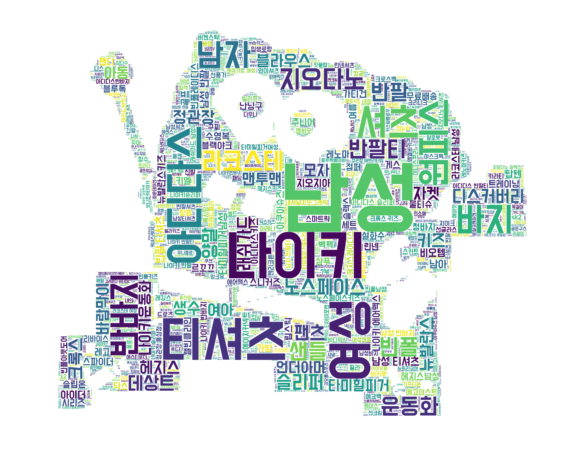

In [713]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(wc_m, interpolation="bilinear")
plt.axis("off")
plt.show()

남성, 아디다스, 셔츠, 지오다노, 반바지, 라코스테 ..... 
와 더불어 여성, 원피스 등의 키워드도 보입니다!

<h3> Top20에는 어떤 키워드들이 들어갈까요? </h3>

In [714]:
wc_m_top20 = WordCloud(
    background_color="white", 
    max_words=20, 
    max_font_size=300, 
    font_path='BMDOHYEON_ttf', 
    ).generate(kwd_str_m)

In [715]:
wc_m_dict = wc_m_top20.words_ 
wc_m_dict.keys()
#'여성'이 같이 들어가 있는 것이 마음에 걸리지만 일단 넘어갑니다.

dict_keys(['남성', '나이키', '티셔츠', '여성', '아디다스', '셔츠', '원피스', '바지', '반바지', '남자', '지오다노', '라코스테', '빈폴', '운동화', '반팔티', '반팔', '샌들', '노스페이스', '슬리퍼', '데상트'])

<h3> 여성 검색어 키워드 </h3>

In [716]:
wc_f = WordCloud(
    background_color="white", 
    max_words=20000, 
    max_font_size=300, 
    font_path='BMDOHYEON_ttf', 
    mask=spon_mask).generate(kwd_str_f)

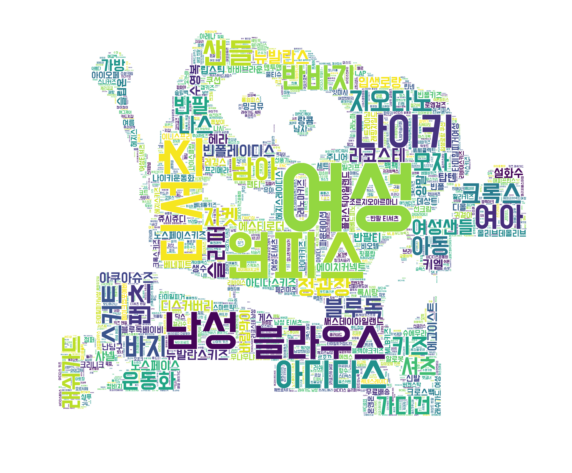

In [717]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(wc_f, interpolation="bilinear")
plt.axis("off")
plt.show()

여성, 원피스, 티셔츠, 나이키, 아디다스 기타 등등이 보입니다.

<h3> Top20에는 어떤 키워드들이 들어갈까요? </h3>

In [718]:
wc_f_top20 = WordCloud(
    background_color="white", 
    max_words=20, 
    max_font_size=300, 
    font_path='BMDOHYEON_ttf', 
    ).generate(kwd_str_f)

In [719]:
wc_f_dict = wc_f_top20.words_ 
wc_f_dict.keys()

dict_keys(['여성', '원피스', '티셔츠', '남성', '나이키', '블라우스', '아디다스', '샌들', '반바지', '여아', '남아', '팬츠', '지오다노', '바지', '크록스', '스커트', '블루독', '아동', '키즈', '래쉬가드'])

<h3> 잠깐! 그래서 이걸로 뭘 할 수 있다고~? </h3>
- 우리는 CLNT_GENDER와 CLNT_AGE의 결측값을 대치할 방법을 찾고 있었습니다. <br>
- 저는 성별로 검색어 특징의 차이가 있지 않을까?라는 가설을 세우고 이를 확인하기 위해 워드 클라우드를 사용했습니다. <br>
- 만약 특징에 큰 차이가 있다면, CLNT_GENDER가 결측인 ROW에 대해서, 만약 그 ROW의 검색어 기록이 존재한다면, 그것을 바탕으로 성별을 추측할 수 있지 않을까요? <br>

In [720]:
#위에서 뽑아낸 TOP20을 리스트형태로 받아옵시다
m_top20 = list(wc_m_dict.keys())
f_top20 = list(wc_f_dict.keys())

In [721]:
#보기가 힘드니 데이터프레임 형태로 넣어서 봅시다
m_top20_df = pd.DataFrame(m_top20, columns = ['M'])
f_top20_df = pd.DataFrame(f_top20, columns = ['F'])
pd.concat([m_top20_df, f_top20_df], axis=1)

,M,F
0,남성,여성
1,나이키,원피스
2,티셔츠,티셔츠
3,여성,남성
4,아디다스,나이키
5,셔츠,블라우스
6,원피스,아디다스
7,바지,샌들
8,반바지,반바지
9,남자,여아


<h3> 하지만 결과는 ....... Fail.....</h3>
특징이 명확하게 분리되지 않았습니다. <br>
남성 검색어 4위에는 여성이, 여성 검색어 4위에는 남성이 들어가 있는 것 부터 등골이 쎄했지만 <br>
그래도 혹시나 하는 마음에 일단 진행해 본 것이었는데 이제는 놓아줄 때가 되었나 봅니다. <br>
검색어를 통한 GENDER 결측값 대치는 사실 상 불가능한 것이라고 판단, 스폰지밥을 보내주겠습니다. <br>

---

<h3> CLNT_GEDNER, CLNT_AGE 결측값이 존재하는 ROW를 삭제합시다 </h3>
가장 빈번하게 나온 값으로 대치하는 방법도 생각해보았지만, 일단 데이터가 118만개이기 때문에 대치보다는 그냥 해당 row를 삭제하는 것이 더 좋다고 판단했습니다.


In [722]:
#일단 결측치 날려보자
prod_sess_drop = prod_sess_class.dropna()

In [723]:
prod_sess_drop

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
5,68.0,4237632.0,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,F,30.0
6,135.0,253618.0,29.0,40.0,697.0,1,0,1,0,1,0,0,0.0,M,40.0
9,156.0,7112398.0,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,6592482.0,5743284.0,33.0,12.0,112.0,0,0,1,0,0,0,1,0.0,M,40.0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,F,30.0
1184057,6592519.0,6188865.0,159.0,52.0,343.0,0,0,1,0,0,0,1,1.0,F,20.0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0


### CLNT_GENDER와 CLNT_AGE를 더미화하자!

In [724]:
#float형인 AGE는 STR로 바꾸어준다. (get_dummies할 때 한번에 바뀔 수 있도록)
prod_sess_drop['CLNT_AGE'] = prod_sess_drop['CLNT_AGE'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [725]:
prod_sess = pd.get_dummies(prod_sess_drop)
prod_sess
#성별과 연령대 모두 더미화된 것을 확인할 수 있다.

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,...,CLNT_GENDER_F,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,68.0,4237632.0,44.0,33.0,418.0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
6,135.0,253618.0,29.0,40.0,697.0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
9,156.0,7112398.0,181.0,236.0,1937.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,6592482.0,5743284.0,33.0,12.0,112.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1184057,6592519.0,6188865.0,159.0,52.0,343.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


<h4> 연속형 변수의 이상치를 확인하자! </h4>

In [726]:
#한글 폰트 깨짐 방지
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

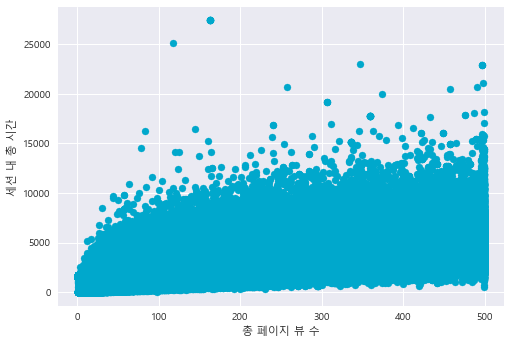

In [936]:
#TOT_PAG_VEIW_CT, TOT_SESS_HR_V
plt.scatter(x='TOT_PAG_VIEW_CT',y='TOT_SESS_HR_V', data=prod_sess, color='#00a8cc')
plt.xlabel("총 페이지 뷰 수")
plt.ylabel("세션 내 총 시간")
plt.show()

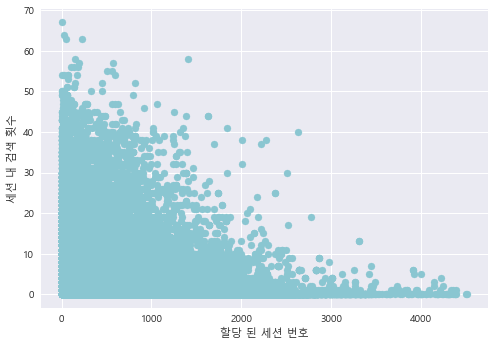

In [728]:
#SESS_SEQ, SUM_SEARCH
plt.scatter(x='SESS_SEQ',y='SUM_SEARCH', data=prod_sess, color='#8ac6d1')
plt.xlabel("할당 된 세션 번호")
plt.ylabel("세션 내 검색 횟수")
plt.show()
#선형관계가 보입니다.

이상치는 없다고 판단하고 다음으로 넘어갑니다.

산점도가 선형으로 나타나는데 그 이유는  
SESS_SEQ(할당된 세션 번호)는 CLNT_ID별로 첫 세션이 발급되었을 때 1, 그리고 이후 방문마다 증가합니다.  
따라서 SESS_SEQ가 높을수록 더 페이지에 자주 들리는 것이라고 생각할 수 있으며, 이는 일종의 충성도라고 할 수 있습니다.  
<br>
이것이 커지면서 검색 횟수는 줄어드는 것을 볼 수 있는데, 자주 페이지에 들리는 사람들은 어떠한 물건을 검색하기 위해 들어오는 것이 아니라   
습관적으로 페이지에 들어오기 때문에 SESS_SEQ가 증가할수록 SUM_SEARCH(검색횟수)는 감소하는 것으로 해석할 수 있습니다.

<h1> <b> Step4. Visualization </b> </h1>
feature도 완성이 되었습니다! 그래도 분석 전에 데이터가 어떻게 생겼는지는 봐야겠죠?

<h3> 1. DVC_CTG_NM(사용 디바이스), SESS_DT_M(계절) </h3>
이 두가지 변수는 더미화하기 전인 데이터셋을 이용해서 확인해보겠습니다. (CLNT_GENDER, CLNT_AGE의 결측값을 삭제하기 전 데이터셋이라 118만개입니다.)

In [729]:
prod_sess_del

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,class,SESS_DT_M
1,25.0,5317297.0,213.0,33.0,865.0,desktop,1,여름
2,25.0,6059256.0,204.0,7.0,99.0,desktop,1,여름
9,33.0,10548225.0,2.0,48.0,1776.0,desktop,1,봄
10,56.0,2108568.0,92.0,44.0,1343.0,mobile,1,여름
11,56.0,2108568.0,92.0,44.0,1343.0,mobile,1,여름
...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,110.0,581.0,mobile,0,여름
1828905,6592524.0,7235959.0,32.0,307.0,3493.0,mobile,0,여름
1828909,6592536.0,61570.0,67.0,57.0,567.0,mobile,0,가을
1828910,6592536.0,1078369.0,62.0,50.0,525.0,mobile,0,가을


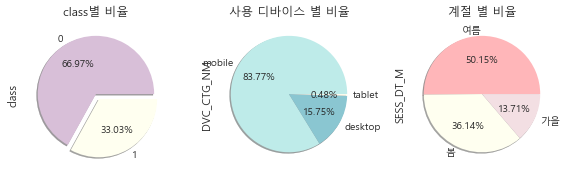

In [730]:
#y값도 껴서 봅시다.
plt.subplot(1,3,1)
y_count = prod_sess['class'].value_counts()
y_count.plot.pie(explode=[0,0.1], shadow=True, autopct='%1.2f%%', colors =['thistle', 'ivory'], )
plt.title('class별 비율')

#DVC_CTG_NM(사용 디바이스)
plt.subplot(1,3,2)
DVC_count = prod_sess_del['DVC_CTG_NM'].value_counts()
DVC_count.plot.pie(shadow=True, autopct='%1.2f%%', colors =['#beebe9', '#8ac6d1', 'ivory'], )
plt.title('사용 디바이스 별 비율')

#SESS_DT_M (계절)
plt.subplot(1,3,3)
V_count = prod_sess_del['SESS_DT_M'].value_counts()
V_count.plot.pie(shadow=True, autopct='%1.2f%%', colors =['#ffb6b9', 'ivory', '#f3dfe3'], )
plt.title('계절 별 비율')


plt.tight_layout()
plt.show()

1. 클래스는 2대 1 비율로 이루어져 있으며 구매를 하지 않은 경우가 더 많다.
2. 사용 디바이스는 핸드폰(mobile)이 약 83%로 전체의 대부분을 차지했으며 tablet은 거의 없었다. (0.4%)
3. 계절로 보았을 때에는 6, 7, 8월의 데이터가 절반을 차지했으며 그 다음으로는 봄(4, 5월), 가을(9월) 순으로 많았다.

<h3> 2. CLNT_AGE, CLNT_GENDER </h3>

In [731]:
prod_sess_class #CLNT_AGE, CLNT_GENDER을 더미화하기 전 데이터 셋

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
0,25.0,5317297.0,213.0,33.0,865.0,1,1,0,0,0,0,1,0.0,NaN,NaN
1,25.0,6059256.0,204.0,7.0,99.0,1,1,0,0,0,0,1,0.0,NaN,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,1,1,0,0,0,1,0,12.0,NaN,NaN
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,0,0,1,0,0,0,1,0.0,F,30.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,0,0,1,0,1,0,0,0.0,NaN,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,0,0,1,0,1,0,0,1.0,NaN,NaN


In [732]:
prod_sess_drop = prod_sess_class.dropna()
prod_sess_drop #더미화 하기 전 데이터 셋으로 시각화를 해봅시다.

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
5,68.0,4237632.0,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,F,30.0
6,135.0,253618.0,29.0,40.0,697.0,1,0,1,0,1,0,0,0.0,M,40.0
9,156.0,7112398.0,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,6592482.0,5743284.0,33.0,12.0,112.0,0,0,1,0,0,0,1,0.0,M,40.0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,F,30.0
1184057,6592519.0,6188865.0,159.0,52.0,343.0,0,0,1,0,0,0,1,1.0,F,20.0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0


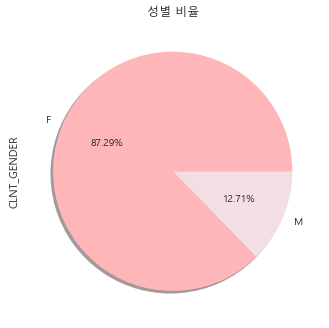

In [733]:
sex_count = prod_sess_drop['CLNT_GENDER'].value_counts()
sex_count.plot.pie(shadow=True, autopct='%1.2f%%', colors =['#ffb6b9', '#f3dfe3'])
plt.title('성별 비율')
plt.show()
#성별은 여성이 87%, 남성이 12% 입니다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


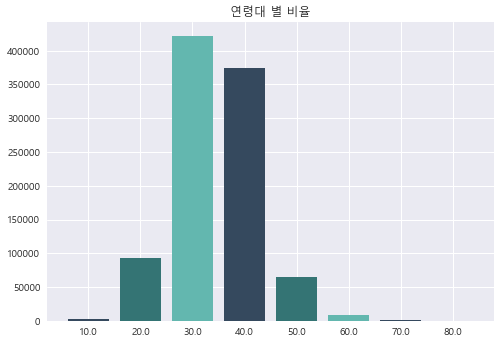

In [734]:
prod_sess_drop['CLNT_AGE'] = prod_sess_drop['CLNT_AGE'].astype(str) #명목형 변수로 바꾸어주기
age_group = prod_sess_drop['CLNT_AGE'].value_counts().sort_index() 
plt.bar(age_group.index,age_group, color=['#35495e', '#347474', '#63b7af'])
plt.title("연령대 별 비율")
plt.show()
#연령대는 30대와 40대가 가장 많았다. 

<h3> 3. 연속형 변수는 클래스 별로 어떻게 분포할까? </h3>

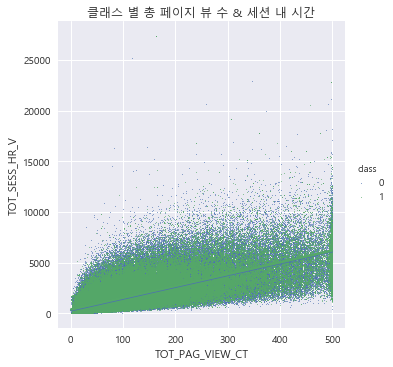

In [735]:
#클래스 별 총 페이지 뷰 수와 세션 내 시간 분포
sns.lmplot(x='TOT_PAG_VIEW_CT', y='TOT_SESS_HR_V', hue='class', data=prod_sess, scatter_kws={"s": 1})
plt.title('클래스 별 총 페이지 뷰 수 & 세션 내 시간')
plt.show()

조금 징그러운 그래프이다. 회귀선이 희미하게 보인다. 비슷한데 아주 살짝 class 1이 위에 있는 것으로 보아  
세션 내 시간과 세션 내 페이지 뷰 수가 클수록 구매가 조금 더 잘 일어난다고 볼 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


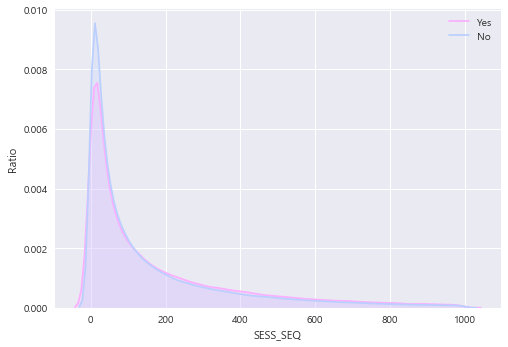

In [736]:
#클래스 별 SESS_SEQ 분포
sns.kdeplot(prod_sess[prod_sess['class'] == 1][prod_sess['SESS_SEQ'] < 1000]['SESS_SEQ'], color = "#faafff",shade= True, label="Yes")
sns.kdeplot(prod_sess[prod_sess['class'] == 0][prod_sess['SESS_SEQ'] < 1000]['SESS_SEQ'], color = "#bbcfff",shade= True, label="No")
plt.xlabel("SESS_SEQ")
plt.ylabel("Ratio")
plt.show()
#SESS_SEQ가 1인 비율은 구매를 하지 않은 사람들이 더 많았다. 

<h1> <b> Step5. Sampling </b> </h1>

샘플링은 두 가지로 진행합니다. 
1. Train 0.8 / Test 0.2로 나눈 데이터 셋 : 복잡하지 않은 Single model을 돌릴 때 사용합니다.
2. Train 0.05 / Test 0.95로 나눈 데이터 셋 : Ensemble, Gridsearchcv 등을 돌릴 때 사용합니다.

## 1. Feature & Target 분리

In [737]:
#최종 데이터셋에서 CLNT_ID, SESS_ID 제거
prod_sess = prod_sess.drop(['CLNT_ID', 'SESS_ID'], axis=1)

In [738]:
prod_sess

,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,...,CLNT_GENDER_F,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0
3,92.0,44.0,1343.0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,92.0,44.0,1343.0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5,44.0,33.0,418.0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
6,29.0,40.0,697.0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
9,181.0,236.0,1937.0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,33.0,12.0,112.0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1184056,27.0,19.0,434.0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1184057,159.0,52.0,343.0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1184058,33.0,110.0,581.0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [739]:
y = prod_sess['class']
X = prod_sess.drop(['class'], axis=1)

In [637]:
print(y.shape)
print(X.shape)

(967232,)
(967232, 22)


In [743]:
X.columns #모든 변수가 알맞게 들어가있다!

Index(['SESS_SEQ', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'DVC_CTG_NM_desktop',
       'DVC_CTG_NM_mobile', 'DVC_CTG_NM_tablet', 'SESS_DT_M_가을', 'SESS_DT_M_봄',
       'SESS_DT_M_여름', 'SUM_SEARCH', 'CLNT_GENDER_F', 'CLNT_GENDER_M',
       'CLNT_AGE_10.0', 'CLNT_AGE_20.0', 'CLNT_AGE_30.0', 'CLNT_AGE_40.0',
       'CLNT_AGE_50.0', 'CLNT_AGE_60.0', 'CLNT_AGE_70.0', 'CLNT_AGE_80.0'],
      dtype='object')

## 2. Train-Test Split

In [747]:
from sklearn.model_selection import train_test_split

#1. Train 0.8, Test 0.2로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [748]:
X_train.shape #64만개

(773785, 20)

In [749]:
X_test.shape #31만개

(193447, 20)

In [750]:
#2. Train 0.05, Test 0.95로 데이터 나누기
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.95, random_state=77)

In [751]:
X_train2.shape #약 5만개

(48361, 20)

In [753]:
X_test2.shape #91만개

(918871, 20)

y의 비율을 살펴봅시다.

In [754]:
y_train.value_counts() #2:1 비율 비슷하게 잘 되었습니다.

0    518627
1    255158
Name: class, dtype: int64

In [755]:
y_train2.value_counts() #마찬가지로!

0    32376
1    15985
Name: class, dtype: int64

## 3. Scaling

In [757]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [758]:
X_train_std

array([[-0.270188  , -0.46881212, -0.59501329, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.55438726,  0.66898677,  1.27236855, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.14461158, -0.73716091, -0.81827978, ..., -0.09438208,
        -0.03909727, -0.00762621],
       ...,
       [-0.61056618, -0.47954607, -0.61891031, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [ 1.93070398, -0.53321583, -0.64690397, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [ 0.05366698,  1.65651034,  1.97357555, ..., -0.09438208,
        -0.03909727, -0.00762621]])

In [759]:
X_test_std

array([[-0.5114269 ,  1.47403316,  1.99474149, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.65352654, -0.84450043, -0.93298551, ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.62378475,  0.2610966 , -0.21197811, ..., -0.09438208,
        -0.03909727, -0.00762621],
       ...,
       [-0.63369868, -0.17899542, -0.4966941 , ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.4255062 , -0.61908744, -0.670801  , ..., -0.09438208,
        -0.03909727, -0.00762621],
       [-0.64361261, -0.66202325, -0.58477171, ..., -0.09438208,
        -0.03909727, -0.00762621]])

In [760]:
scaler2 = StandardScaler()
X_train2_std = scaler.fit_transform(X_train2)
X_test2_std = scaler.transform(X_test2)

In [761]:
X_train2_std

array([[-0.58140288,  1.0223169 ,  1.08505451, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [-0.31350677, -0.53429603, -0.52070357, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [-0.63432063, -0.42694341, -0.46198963, ..., -0.09626018,
        -0.04045022, -0.00454733],
       ...,
       [-0.60786175, -0.48061972, -0.62038073, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [ 1.93549759, -0.53429603, -0.64837227, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [ 0.05691748,  1.65569734,  1.97190815, ..., -0.09626018,
        -0.04045022, -0.00454733]])

In [762]:
X_test2_std

array([[-0.50864097,  1.47319789,  1.99307248, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [-0.65085742, -0.84561861, -0.93443206, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [-0.62109119,  0.26011333, -0.21347945, ..., -0.09626018,
        -0.04045022, -0.00454733],
       ...,
       [ 0.07345428, -0.68458969, -0.77672368, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [ 0.93667507,  3.1478987 ,  3.77565512, ..., -0.09626018,
        -0.04045022, -0.00454733],
       [-0.30027733, -0.74900126, -0.73849134, ..., -0.09626018,
        -0.04045022, -0.00454733]])

---

<h1> <b> Step6. Modeling </b> </h1>

<h3> 1. 먼저 간단하게 단일 모델에 대한 성능을 살펴봅시다! </h3>

# Decision Tree

In [763]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=77)

In [764]:
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

In [765]:
dt.score(X_test_std, y_test)
#오....... 생각보다 괜찮은데?

0.6864929412190419

#### max_depth 를 살짝 조정해봅시다.

In [766]:
#max_depth = 7
dt2 = DecisionTreeClassifier(random_state=77, max_depth = 7)
dt2.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

In [767]:
dt2.score(X_test_std, y_test)
#오히려 더 떨어졌다!!

0.6689532533458776

In [768]:
#max_depth = 10
dt3 = DecisionTreeClassifier(random_state=77, max_depth = 10)
dt3.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

In [769]:
dt3.score(X_test_std, y_test)
#별 차이가 없다!! 다음으로 넘어가자!

0.669609763914664

In [781]:
# Train 0.05 Test 0.95 data를 이용해보자
dt4 = DecisionTreeClassifier(random_state=77)
dt4.fit(X_train2_std, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

In [786]:
dt4.score(X_test2_std, y_test2)
#정확도가 많이 낮아졌다 ㅠㅠ 과연 나는 0.7을 넘을 수 있을까?

0.5764933271373239

# Logistic Regression

In [788]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
#이것 또한 DT와 비슷하다.

0.6673714247313217

In [790]:
# Train 0.05 Test 0.95 data를 이용해보자
lr2 = LogisticRegression()
lr2.fit(X_train2_std, y_train2)
lr2.score(X_test2_std, y_test2)
#로지스틱 결과는 유사하게 나왔다!

0.669133099205438

# K-Means Clustering

In [891]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2,algorithm='auto')
model.fit(X_train_std, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [892]:
# k-means 방법을 사용하여 data를 두 개의 군집으로 나누고 이를 predict라는 이름으로 저장
y_pred = model.predict(X_test_std)

In [893]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64502, 64648],
       [32377, 31920]], dtype=int64)

In [894]:
# K-means는 이 데이터 셋과 상극인가 보다! 여기엔 발도 들이지 말아야겠다!
accuracy_score(y_test, y_pred)

0.4984414335709523

<h1> 2. Ensemble 해봅시다 ~ ! </h1>

In [795]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm as lgb

## 2-1. Default Model
디폴트 모델로 돌려보면서 전반적인 점수를 확인하고 추가로 진행할 모델을 선정합시다.

### Gradient Boost

In [796]:
gbrt = GradientBoostingClassifier(random_state = 77)
gbrt.fit(X_train2_std, y_train2)
gbrt.score(X_test2_std, y_test2)
#So So 하다~

0.6713706276506713

### Random Forest

In [798]:
Rfr= RandomForestClassifier()
Rfr.fit(X_train2_std, y_train2)
Rfr.score(X_test2_std, y_test2)

0.6500477216061885

### XGBoost

In [801]:
xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train2_std, y_train2)
xgb_c.score(X_test2_std, y_test2)

0.6711616755779647

### LightGBM

In [803]:
lgb_c = lgb.LGBMClassifier()
lgb_c.fit(X_train2_std, y_train2)
lgb_c.score(X_test2_std, y_test2)

0.6696750686440207

## 2-2. GridSearchCV
네 개의 모델 다 score의 차이가 크지 않아서 전부 다 튜닝해 볼 가치가 있지만,  
시간 관계상 Gradient Boost, XGBoost 두 개에 대해서만 하이퍼 파라미터 튜닝을 해보겠습니다

## &#10112; Gradient Boost
Graident Boost의 하이퍼파라미터 튜닝은 [이곳](https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/)을 참조하였습니다.  

#### Baseline model Score : 0.6713706276506713

#### Tune1 Score : 0.6715329060099838 (Learning_rate, n_estimators)

In [ ]:
# step1. Learning late와 n_estimators를 조절해봅시다.
gbrt_p = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
gbrt_tune = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features='sqrt', random_state=77), 
            param_grid = gbrt_p, scoring='accuracy',n_jobs=4, iid=False, cv=5, verbose = True)
gbrt_tune.fit(X_train2_std,y_train2)

In [806]:
gbrt_tune.best_params_, gbrt_tune.best_score_

({'learning_rate': 0.005, 'n_estimators': 1250}, 0.6715329060099838)

#### Tune2 Score : 0.6715329060099838 (max_depth)

In [807]:
# step2. 위의 결과를 바탕으로 max_depth를 조절해봅시다.
gbrt_p = {'max_depth':[2,3,4,5,6,7] }
gbrt_tune2 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005,n_estimators=1250, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=77), 
            param_grid = gbrt_p, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose = True)
gbrt_tune2.fit(X_train2_std,y_train2)
gbrt_tune2.best_params_, gbrt_tune2.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  5.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 4}, 0.6715329060099838)

#### Tune3 Score : 0.6715949279230677 (min_samples_split, min_samples_leaf, max_features)

In [811]:
# step3. min_samples_split, min_samples_leaf, max_features 값을 조절해봅시다.
gbrt_p= {'min_samples_split':[2,4,6,8,10,20,40,60], 'min_samples_leaf':[1,3,5,7,9], 'max_features':[2,3,4,5,6,7]}
gbrt_tune3 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005, n_estimators=1250, max_depth=4, subsample=1, random_state=77), 
param_grid = gbrt_p, scoring='accuracy',n_jobs=4,iid=False, cv=5, verbose=True)
gbrt_tune3.fit(X_train2_std,y_train2)
gbrt_tune3.best_params_, gbrt_tune3.best_score_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 20.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 51.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 101.9min
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed: 177.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 2},
 0.6715949279230677)

위의 결과를 종합해서 최종 스코어를 내보자!

#### Tune4 Score : 0.6713009769597691 (오히려 디폴트였을 때 보다 아주 살짝 더 낮아졌다 ㅋㅋㅋ)

In [821]:
gbrt_tune4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1250, max_depth=4, subsample=1, random_state=77,
                          max_features=4, min_samples_leaf=5, min_samples_split=2)
gbrt_tune4.fit(X_train2_std, y_train2)
gbrt_tune4.score(X_test2_std, y_test2)

0.6713009769597691

#### [결론] 
하이퍼 파라미터 튜닝은 굉장히 어렵다.   
그냥 한꺼번에 모든 파라미터에 대한 조합을 돌려놓고 자고 일어났으면 결과가 달라져있었을까?  
다음부턴 자기 전에 꼭 모든 파라미터 조합에 대한 그리드 서치를 돌려놓을 것이다.

---
## &#10113; XGBoost
XGBoost의 하이퍼파라미터 튜닝은 [이곳](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)을 참조하였습니다.
<br>

이번에는 tree와 관련된 하이퍼 파라미터를 먼저 튜닝해보겠습니다. <br>
learning_rate와 n_estimators에 대한 최적의 파라미터를 먼저 찾는 것도 좋지만,  <br> 
초반에 learning_rate를 너무 낮게 잡았더니 학습이 느려 비효율적이라는 생각이 들었습니다. <br>

<br>

따라서 이번에는 
1. Tune Tree-specific parameters (max_depth, min_child_weight)
2. Tune Regularization parameters (gamma, alpha)
3. Reducing Leraning rate

순서로 진행합니다.


#### Baseline model Score : 0.6711616755779647

#### Tune1 Score : 0.6676454277367861 (max_depth, min_child_weight)

In [813]:
# step1 : Tune Tree-specific parameters
xgb_p = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

xgb_tune = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=500,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = xgb_p, scoring='accuracy',n_jobs=4, iid=False, cv=5, verbose = True)
xgb_tune.fit(X_train2_std, y_train2)
xgb_tune.best_params_, xgb_tune.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  6.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_child_weight': 3}, 0.6676454277367861)

#### Tune2 Score : 0.6696098461887339 (gamma, reg_alpha)

In [815]:
# step2 : Tune Regularization parameters 
xgb_p = {
 'gamma':[i/10.0 for i in range(0,5)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]

}

#이때 max_depth와 min_child_weight는 위에서 찾은 최적의 파라미터로 대체할 것.
xgb_tune2 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=500, subsample=0.8, colsample_bytree=0.8,
 max_depth=3,min_child_weight=3, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = xgb_p, scoring='accuracy',n_jobs=4, iid=False, cv=5, verbose = True)
xgb_tune2.fit(X_train2_std, y_train2)
xgb_tune2.best_params_, xgb_tune2.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  8.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.3, 'reg_alpha': 100}, 0.6696098461887339)

디폴트로 주었을 때 보다 낮다니 믿을 수가 없다. 하지만 그래도 마지막까지 해보자.

#### Tune3 Score : 0.6698373004868805 (점점 더 산으로 가는 것 같다. 망한걸까?)

In [819]:
# step3 : Reducing learning rate
xgb_p = {
    'learning_rate' : [0.15,0.1,0.05,0.01,0.005,0.001]
}

xgb_tune3 = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.8, colsample_bytree=0.8, gamma=0.3,
 reg_alpha=100, max_depth=3,min_child_weight=3, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = xgb_p, scoring='accuracy',n_jobs=4, iid=False, cv=5, verbose = True)
xgb_tune3.fit(X_train2_std, y_train2)
xgb_tune3.best_params_, xgb_tune3.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'learning_rate': 0.15}, 0.6698373004868805)

이렇게 된 이상 직접 하이퍼 파라미터를 튜닝해봅시다.........ㅋ

#### Tune4 Score : 0.6710474049132032

In [828]:
xgb_tune4 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001)
xgb_tune4.fit(X_train2_std, y_train2)
xgb_tune4.score(X_test2_std, y_test2)

0.6710474049132032

# 2-3. Stacking

In [837]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

스태킹에 사용할 모델은 가장 score가 높게 나왔던 세 가지로 합니다
1. DT Sigle model : dt //  0.6864929412190419
2. Gradient Boost Default model : gbrt // 0.6713706276506713
3. XGBBoost Default model : xgb_c // 0.6711616755779647

In [843]:
averaged_models = AveragingModels(models = (gbrt, xgb_c, dt))

In [860]:
averaged_models.fit(X_train2_std, y_train2)

In [898]:
y_pred = averaged_models.predict(X_test2_std)

In [899]:
y_pred #세 가지 모데로부터 받은 결과값의 평균이 나와있다. 이를 0과 1로 분리하자.

array([0.33333333, 0.        , 0.33333333, ..., 0.        , 0.33333333,
       0.        ])

0.5 이상(즉, 두 개 이상의 모델에서 1이라고 투표한 경우)를 기준으로 잘라봅시다.

In [900]:
y_pred_5 = y_pred > 0.5

In [901]:
print(y_pred_5.shape)
print(y_test2.shape)

(918871,)
(918871,)


In [902]:
confusion_matrix(y_test2, y_pred_5)

array([[608967,   6434],
       [295490,   7980]], dtype=int64)

In [903]:
accuracy_score(y_test2, y_pred_5)

0.6714185125006665

[결론] 그냥 dt default model로 예측했을 때가 가장 높다. 이것은 하이퍼 파라미터 튜닝의 문제보다는 데이터 자체의 문제라는 생각이 든다.

---

<h1> <b> Step 7. What's the problem? </b> </h1>

<p> 
    열심히 하이퍼 파라미터 튜닝을 해 보았지만 성능은 전혀 나아지지 않고 있다.  <br>
    어떻게 하면 더 좋은 성능을 낼 수 있을지에 대한 고민 끝에 다음과 같은 네 가지 가설을 세울 수 있었다.
</p>


### 1. Feature가 부족하다. 
  : 피쳐가 부족한 건 처음부터 우려했던 부분이었다. <br> 
  더 만들 수 있는 변수는 어떤 것이 있을까 생각해본 결과 <br>
  PRODUCT 데이터 셋을 이용하여 '구매이력' 변수를 만들 수 있겠다 생각했음. <br>
  <b>[구매이력] SESS_ID를 기준으로, 데이터 기간 내 다른 날짜에 구매한 이력을 COUNT하여 생성</b>
  
### 2. 나의 Hyper Parameter Tuning의 능력이 부족하다.
  : 하이퍼 파라미터 문제에 앞서 모델 선정 능력 또한 부족한 것은 아닐까 생각해보았고 <br>
  대안으로 AutoML과 Scikit-optimize를 생각해보았으나 <br>
  현재 이 구린 성능의 원인은 모델과 하이퍼 파라미터의 문제보다는 데이터 셋 자체의 문제가 더 크다고 생각해서 일단 Pass  <br>
  
### 3. 애초에 Accuracy만이 좋은 지표로 작용하는가?
  : 이 부분에 대해서도 많이 생각해보았다. Confusion matrix에서 예측이 잘못된 부분은 False Nagative, False Positive로 나눌 수 있는데 자꾸 헷갈려서 적어놓겠다.
  - False Nagative (confusion matrix의 2행 1열) : 예측은 0이라고 했는데 실제 1인 것들의 숫자 ---> Recall Score와 관련  
  - False Positive (confusion matrix의 1행 2열) : 예측은 1이라고 했는데 실제 0인 것들의 숫자 ---> Precision Score와 관련  
  <br>
  이 중에서도 나의 데이터에서 더 중요한 지표는 False Nagative와 연관된 Recall Score라고 생각했다.
  구매를 한 사람들을 안 했다고 예측한다면 추후에도 잠재고객을 놓쳐버릴 수 있기 때문에 Accuracy와 더불어 Recall 값 또한 성능에 중요한 영향을 미친다.
  반대로 Precision Score의 경우 잠재고객이라고 예측했으나 실제 구매하지 않은 케이스에 대한 지표로 상대적으로 중요도가 떨어진다.
  따라서 추후 분석에서는 Accuracy와 Recall, Precision의 적절한 조화를 찾아보도록 하겠다.
  
### 4. 모든 데이터에 대해 고려하다보니 생긴 일?
  : 나의 모델 성능에 가장 많이 영향을 미친 부분이라고 생각한다. <br>
  애초에 시각화 파트에서 보면 알겠지만, 30, 40대 여성의 내역이 데이터의 80%이상을 차지하고 
  이는 다시 말해 롯데 계열사의 주고객이 30, 40대 여성이라는 뜻이기 때문에 <br>
  모든 데이터를 고려했을 때 성능이 좋다면 문제가 되지 않으나, 지금과 같은 상황이 발생한 경우
  주고객층의 class라도 잘 예측하자는 의미에서 데이터 셋을 분리할 필요가 있다고 본다.
  
<br>

---

<h1> <b> Step 8. 30, 40대 여성의 경우만 고려하자! </b> </h1>

In [909]:
#위의 단계 중 하나였던 데이터 셋을 이용한다.
#이는 clnt_gender, clnt_age의 결측치 row를 모두 제거하고 더미화하기 '전'의 데이터이다!
prod_sess_drop

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
5,68.0,4237632.0,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,F,30.0
6,135.0,253618.0,29.0,40.0,697.0,1,0,1,0,1,0,0,0.0,M,40.0
9,156.0,7112398.0,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,6592482.0,5743284.0,33.0,12.0,112.0,0,0,1,0,0,0,1,0.0,M,40.0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,F,30.0
1184057,6592519.0,6188865.0,159.0,52.0,343.0,0,0,1,0,0,0,1,1.0,F,20.0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0


In [916]:
prod_sess_filter = prod_sess_drop.query("CLNT_GENDER == 'F'")

In [927]:
F3040 = prod_sess_filter.query('CLNT_AGE in ["30.0", "40.0"]')
F3040 #30, 40대 여성에 대한 데이터인 F3040이 완성되었다!

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
3,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,F,40.0
5,68.0,4237632.0,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,F,30.0
9,156.0,7112398.0,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,F,40.0
10,159.0,1206445.0,177.0,252.0,3733.0,1,0,1,0,1,0,0,4.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184053,6592481.0,949356.0,15.0,150.0,2351.0,0,0,1,0,1,0,0,0.0,F,30.0
1184054,6592481.0,962852.0,7.0,145.0,3632.0,0,0,1,0,1,0,0,0.0,F,30.0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,F,30.0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,F,30.0


In [929]:
F3040.shape[0] / prod_sess_drop.shape[0]
#전체 중 30,40대 여성의 비율은 72% 

0.7235937189836564

In [930]:
F3040['CLNT_GENDER'].value_counts() #여성밖에 없는 것 확인

F    699883
Name: CLNT_GENDER, dtype: int64

In [932]:
F3040['CLNT_AGE'].value_counts() #30, 40대 밖에 없는 것도 확인

30.0    376612
40.0    323271
Name: CLNT_AGE, dtype: int64

In [935]:
F3040.isnull().sum() #결측치 없는 것 확인! 

CLNT_ID               0
SESS_ID               0
SESS_SEQ              0
TOT_PAG_VIEW_CT       0
TOT_SESS_HR_V         0
class                 0
DVC_CTG_NM_desktop    0
DVC_CTG_NM_mobile     0
DVC_CTG_NM_tablet     0
SESS_DT_M_가을          0
SESS_DT_M_봄           0
SESS_DT_M_여름          0
SUM_SEARCH            0
CLNT_GENDER           0
CLNT_AGE              0
dtype: int64

In [942]:
# 분석을 위해 CLNT_ID, SESS_ID 그리고 이제는 변수로서의 의미를 잃어버린 CLNT_GENDER을 드롭해줍시다.
F3040_drop = F3040.drop(['CLNT_ID', 'SESS_ID', 'CLNT_GENDER'], axis=1)

In [943]:
F3040_drop

,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_AGE
3,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,40.0
4,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,40.0
5,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,30.0
9,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,40.0
10,177.0,252.0,3733.0,1,0,1,0,1,0,0,4.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1184053,15.0,150.0,2351.0,0,0,1,0,1,0,0,0.0,30.0
1184054,7.0,145.0,3632.0,0,0,1,0,1,0,0,0.0,30.0
1184056,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,30.0
1184058,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,30.0


#### 이제 아까 위에서 했던 것과 똑같이 전처리를 진행합니다. 쭉쭉 ~ ~ ~! &#128663; ~ &#128663;  ~ &#128663;

In [944]:
#더미화
prod_f3040 = pd.get_dummies(F3040_drop)
prod_f3040

,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_AGE_30.0,CLNT_AGE_40.0
3,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,0,1
4,92.0,44.0,1343.0,1,0,1,0,0,0,1,3.0,0,1
5,44.0,33.0,418.0,1,0,1,0,0,0,1,0.0,1,0
9,181.0,236.0,1937.0,1,0,1,0,0,0,1,0.0,0,1
10,177.0,252.0,3733.0,1,0,1,0,1,0,0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184053,15.0,150.0,2351.0,0,0,1,0,1,0,0,0.0,1,0
1184054,7.0,145.0,3632.0,0,0,1,0,1,0,0,0.0,1,0
1184056,27.0,19.0,434.0,0,0,1,0,1,0,0,0.0,1,0
1184058,33.0,110.0,581.0,0,0,1,0,0,0,1,0.0,1,0


In [946]:
# feature & target을 분리함.
y = prod_f3040['class']
X = prod_f3040.drop(['class'], axis=1)
print(y.shape)
print(X.shape)

(699883,)
(699883, 12)


In [953]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=77)

In [950]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559906, 12)
(559906,)
(139977, 12)
(139977,)


In [954]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(69988, 12)
(69988,)
(629895, 12)
(629895,)


In [951]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [955]:
scaler2 = StandardScaler()
X_train_std2 = scaler.fit_transform(X_train2)
X_test_std2 = scaler.transform(X_test2)

# Modeling

## 1. Decision Tree :: 0.6854768997763918


In [969]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)
dt.score(X_test_std, y_test)

0.6854768997763918

In [964]:
y_pred = dt.predict(X_test_std)
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred))

Confusion matrix : 
 [[66539 25704]
 [18376 29358]]
Accuracy Score :  0.6850911221129186
Recall Score :  0.6150333095906482
Precision Score :  0.5331807780320366


## 2. Random Forest :: 0.6559791711316966

In [963]:
Rfr= RandomForestClassifier(n_estimators = 1000)
Rfr.fit(X_train_std2, y_train2)
Rfr.score(X_test_std2, y_test2)

0.6572158851872137

In [ ]:
y_pred = Rfr.predict(X_test_std2)

In [966]:
print("Confusion matrix : \n", confusion_matrix(y_test2, y_pred))
print("Accuracy Score : ", accuracy_score(y_test2, y_pred))
print("Recall Score : ", recall_score(y_test2, y_pred))
print("Precision Score : ", precision_score(y_test2, y_pred))

Confusion matrix : 
 [[357808  57496]
 [158422  56169]]
Accuracy Score :  0.6572158851872137
Recall Score :  0.26174909478962305
Precision Score :  0.49416267100690625


## 3. XGBoost :: 0.6615356527675248

In [959]:
xgb_c = xgb.XGBClassifier()

In [961]:
xgb_c.fit(X_train_std2, y_train2)
xgb_c.score(X_test_std2, y_test2)

0.6615356527675248

In [967]:
y_pred = xgb_c.predict(X_test_std2)
print("Confusion matrix : \n", confusion_matrix(y_test2, y_pred))
print("Accuracy Score : ", accuracy_score(y_test2, y_pred))
print("Recall Score : ", recall_score(y_test2, y_pred))
print("Precision Score : ", precision_score(y_test2, y_pred))

Confusion matrix : 
 [[411599   3705]
 [209492   5099]]
Accuracy Score :  0.6615356527675248
Recall Score :  0.02376148114319799
Precision Score :  0.5791685597455702


### [결론] 
- 30, 40대 여성의 데이터로만 분석한 결과도 위와 차이가 없었다.
- recall 값을 보면 오히려 앙상블 기법을 적용한 게 훨씬 점수가 떨어져 나온다! 샘플링 크기의 차이 때문일까?
- 차라리 이런 큰 데이터들은 앙상블 하려고 train set 크기를 줄이는 것보다 많은 train 가지고 간단한 모델에 적합시키는 게 나을 수도 있겠다고 생각했다.

---

<h1> <b> Step 9. 구매이력 변수를 새로 만들자 </b> </h1>
- 너무 멀리까지 와버려서 솔직히 변수를 새로 만드는 게 겁이 난다. 또 얼만큼 더 해야하는걸까? <br>
- 하지만 첫 단추를 잘못끼웠다면 다시 처음부터 끼우는 게 맞다.... <br>
- 또, 추가적으로 처음에 제거하였던 HITS_SEQ도 분석에 포함시켜보고자 한다.
<br><br>
[HITS_SEQ] Web/App에서 페이지 또는 화면 클릭, 이벤트 참여, 검색 등 방문자의 행위에 대해 순서대로 배열된 일련번호. 세션 내에서 발생되며, 첫번째 행위에 대해서는 1로 설정됨<br>
(즉 몇 번째 행위에서 구매가 일어났는지에 대한 지표로, 이는 product에만 있으므로 구매가 일어나지 않은 경우에 대해서는 0으로 결측값 처리하자.)


### How! 구매이력 변수는 어떻게 만들까?

1. PRODUCT 데이터 셋에는 구매가 발생했을 때 해당 CLNT_ID, SESS_ID와 어떤 상품을 구매하였는지에 대한 정보가 있다.
2. 이를 COUNT하여 구매이력(BUY_CNT)변수로 이용하자는 것이 기본 아이디어

#### 주의할 점
1. 그런데 이때, 구매 시 두 개의 다른 상품을 구매하였다면 구매 한 건에 대해 ROW가 두 개 생긴다. <br>
==> SESS_ID가 같다면 동일한 구매로 간주, SESS_ID가 다른 경우에만 다른 날짜에 구매한 것으로 간주하여 이 경우 BUY_CNT를 1증가시킴.

2. session 정보는 있으나 구매로 이어진 적 없는 경우에는 0, 첫 번째 구매 시 buy_cnt는 1, 두 번째 구매 시 buy_cnt는 2로 둔다.

--- 

### 구매이력 변수를 만들자!

In [1004]:
prod_buy = product.merge(session, on=["CLNT_ID", "SESS_ID"], how="inner")

In [1007]:
prod_buy_sort = prod_buy.sort_values(by=['CLNT_ID', 'SESS_DT'])
prod_buy_sort

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
307620,25,6059256,8,715072,(not set),[이롬],"47,000",1,204,20180621,7.0,99,desktop,Gyeonggi-do,Osan-si
32606,25,5317297,8,598634,피테로마 때박살:피테로마 때박살 120종,[유씨지],"39,800",1,213,20180703,33.0,865,desktop,Gyeonggi-do,Hwaseong-si
284679,33,10548225,13,605825,(not set),[슈에무라],"49,000",1,2,20180407,48.0,"1,776",desktop,Seoul,Seoul
237322,56,2108568,57,425529,선택:데일리 디펜스 / 1개,비욘드,"4,500",1,92,20180826,44.0,"1,343",mobile,Busan,Busan
237323,56,2108568,57,425529,선택:딥모이 / 1개,비욘드,"4,500",1,92,20180826,44.0,"1,343",mobile,Busan,Busan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212471,6592519,2373889,127,737746,색상:403 / 1개,입생로랑,"43,000",1,221,20180821,128.0,"2,762",mobile,Gyeongsangbuk-do,Pohang-si
44012,6592524,8220549,19,813954,색상:돌체 비타 / 1개,나스,"40,000",1,10,20180516,75.0,851,mobile,Seoul,Seoul
44013,6592524,8220549,19,817564,1개,맥,"47,000",1,10,20180516,75.0,851,mobile,Seoul,Seoul
44014,6592524,8220549,19,748742,1개,맥,"48,000",1,10,20180516,75.0,851,mobile,Seoul,Seoul


In [1020]:
from tqdm import tqdm

In [ ]:
CLNT_ID = 0
SESS_ID = 0
count = 0
bar = tqdm(prod_buy_sort.iterrows())
BUY_CNT = []
for idx, member in bar:
    if member["CLNT_ID"] != CLNT_ID :
        CLNT_ID = member["CLNT_ID"]
        SESS_ID = member['SESS_ID']
        count = 1
    if SESS_ID != member['SESS_ID'] :
        SESS_ID = member['SESS_ID']
        count += 1
    BUY_CNT.append(count)

In [1058]:
prod_buy_sort["BUY_CNT"] = BUY_CNT
prod_buy_sort["BUY_CNT"]

307620    1
32606     2
284679    1
237322    1
237323    1
         ..
212471    3
44012     1
44013     1
44014     1
392067    1
Name: BUY_CNT, Length: 403714, dtype: int64

In [1044]:
prod_buy_sort = prod_buy_sort[{'CLNT_ID', 'SESS_ID', 'BUY_CNT'}]
prod_buy_sort

,CLNT_ID,BUY_CNT,SESS_ID
307620,25,1,6059256
32606,25,2,5317297
284679,33,1,10548225
237322,56,1,2108568
237323,56,1,2108568
...,...,...,...
212471,6592519,3,2373889
44012,6592524,1,8220549
44013,6592524,1,8220549
44014,6592524,1,8220549


필요없는 나머지 변수는 전부 드랍합니다.   
이제 이 데이터셋을 CLNT_ID와 SESS_ID를 기준으로 합쳐봅시다!

---
# 여기서부터 전처리 다시 하는 과정이오니 넘겨주세요
그저 다른 점 하나는 HITS_SEQ가 있다는 것.....


In [972]:
#거의 태초의 상태로 돌아왔다. 이 모습을 보니 살짝 멘탈이 흔들린다.
prod_sess_class2 = prod_sess_full.loc[prod_sess_full['CLNT_ID'].notnull()]
prod_sess_class2

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,8.0,6964877.0,7.0,2018-06-06,38.0,366.0,mobile,Gyeonggi-do,Gwangmyeong-si,NaN,NaN,NaN,NaN,NaN,NaN
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,Gyeonggi-do,Hwaseong-si,8.0,598634.0,피테로마 때박살:피테로마 때박살 120종,[유씨지],39800.0,1.0
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,8.0,715072.0,(not set),[이롬],47000.0,1.0
3,25.0,8113243.0,160.0,2018-05-18,28.0,1540.0,desktop,Gyeonggi-do,Osan-si,NaN,NaN,NaN,NaN,NaN,NaN
4,25.0,9506206.0,111.0,2018-04-25,12.0,242.0,desktop,Gyeonggi-do,Hwaseong-si,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828908,6592524.0,8220549.0,10.0,2018-05-16,75.0,851.0,mobile,Seoul,Seoul,19.0,813954.0,색상:돌체 비타 / 1개,나스,40000.0,1.0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN
1828911,6592536.0,1347403.0,57.0,2018-09-08,239.0,1214.0,mobile,Busan,Busan,NaN,NaN,NaN,NaN,NaN,NaN


In [974]:
#y값 생성하기
prod_sess_class2['class']=1

#PD_C가 null이 아니라면 구매로 이어진 case로 class 값을 1로 할당하며
prod_sess_class_a = prod_sess_class2.loc[prod_sess_class2['PD_C'].notnull()]
prod_sess_class_a['class']=1

#PD_C가 null이라면 구매로 이어지지 않은 case로 class 값을 0으로 할당함.
prod_sess_class_b = prod_sess_class2.loc[prod_sess_class2['PD_C'].isnull()]
prod_sess_class_b['class']=0

#이후 위의 두 개를 합치면~ 짜잔 class 값이 저장되어 있는 최종 데이터 셋 완성!
prod_sess_class2 = pd.concat([prod_sess_class_a,prod_sess_class_b],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [976]:
prod_sess_class2['class'].value_counts()

0    780349
1    403714
Name: class, dtype: int64

In [977]:
#변수 삭제, 이때 HITS_SEQ는 남겨둠.
prod_sess_del2 = prod_sess_class2.drop(['PD_C','PD_ADD_NM', 'PD_BRA_NM', 'PD_BUY_AM', 'PD_BUY_CT', 'ZON_NM', 'CITY_NM'], axis=1)
prod_sess_del2

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,HITS_SEQ,class
1,25.0,5317297.0,213.0,2018-07-03,33.0,865.0,desktop,8.0,1
2,25.0,6059256.0,204.0,2018-06-21,7.0,99.0,desktop,8.0,1
9,33.0,10548225.0,2.0,2018-04-07,48.0,1776.0,desktop,13.0,1
10,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,57.0,1
11,56.0,2108568.0,92.0,2018-08-26,44.0,1343.0,mobile,57.0,1
...,...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,2018-06-02,110.0,581.0,mobile,NaN,0
1828905,6592524.0,7235959.0,32.0,2018-06-01,307.0,3493.0,mobile,NaN,0
1828909,6592536.0,61570.0,67.0,2018-09-30,57.0,567.0,mobile,NaN,0
1828910,6592536.0,1078369.0,62.0,2018-09-12,50.0,525.0,mobile,NaN,0


In [978]:
#계절변수 생성 및 더미화 (+사용기기까지 같이 더미화됨.)
prod_sess_del2['SESS_DT'] = pd.to_datetime(prod_sess_del2['SESS_DT'], format='%Y-%m-%d')
prod_sess_del2['SESS_DT_M'] = prod_sess_del2['SESS_DT'].dt.month
prod_sess_del2['SESS_DT_M']
prod_sess_del2.drop(['SESS_DT'], axis=1, inplace=True)
prod_sess_del2['SESS_DT_M'] = prod_sess_del2['SESS_DT_M'].apply(vacation)
prod_sess_dum2 = pd.get_dummies(prod_sess_del2)

In [979]:
prod_sess_dum2

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름
1,25.0,5317297.0,213.0,33.0,865.0,8.0,1,1,0,0,0,0,1
2,25.0,6059256.0,204.0,7.0,99.0,8.0,1,1,0,0,0,0,1
9,33.0,10548225.0,2.0,48.0,1776.0,13.0,1,1,0,0,0,1,0
10,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1
11,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828904,6592524.0,7212211.0,33.0,110.0,581.0,NaN,0,0,1,0,0,0,1
1828905,6592524.0,7235959.0,32.0,307.0,3493.0,NaN,0,0,1,0,0,0,1
1828909,6592536.0,61570.0,67.0,57.0,567.0,NaN,0,0,1,0,1,0,0
1828910,6592536.0,1078369.0,62.0,50.0,525.0,NaN,0,0,1,0,1,0,0


In [982]:
#sum_search 변수 생성
prod_search22 = prod_sess_dum2.merge(prod_search, on=["CLNT_ID", "SESS_ID"], how="left")
prod_search22

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH
0,25.0,5317297.0,213.0,33.0,865.0,8.0,1,1,0,0,0,0,1,NaN
1,25.0,6059256.0,204.0,7.0,99.0,8.0,1,1,0,0,0,0,1,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,13.0,1,1,0,0,0,1,0,12.0
3,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1,3.0
4,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,NaN,0,0,1,0,0,0,1,NaN
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,NaN,0,0,1,0,0,0,1,NaN
1184060,6592536.0,61570.0,67.0,57.0,567.0,NaN,0,0,1,0,1,0,0,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,NaN,0,0,1,0,1,0,0,1.0


In [983]:
#고객 정보를 담은 Cust 데이터 셋과 merge
prod_sess_cust2 = prod_search22.merge(cust, on="CLNT_ID", how="left")
prod_sess_cust2

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,SUM_SEARCH,CLNT_GENDER,CLNT_AGE
0,25.0,5317297.0,213.0,33.0,865.0,8.0,1,1,0,0,0,0,1,NaN,NaN,NaN
1,25.0,6059256.0,204.0,7.0,99.0,8.0,1,1,0,0,0,0,1,NaN,NaN,NaN
2,33.0,10548225.0,2.0,48.0,1776.0,13.0,1,1,0,0,0,1,0,12.0,NaN,NaN
3,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1,3.0,F,40.0
4,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,0,0,1,3.0,F,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184058,6592524.0,7212211.0,33.0,110.0,581.0,NaN,0,0,1,0,0,0,1,NaN,F,30.0
1184059,6592524.0,7235959.0,32.0,307.0,3493.0,NaN,0,0,1,0,0,0,1,NaN,F,30.0
1184060,6592536.0,61570.0,67.0,57.0,567.0,NaN,0,0,1,0,1,0,0,NaN,NaN,NaN
1184061,6592536.0,1078369.0,62.0,50.0,525.0,NaN,0,0,1,0,1,0,0,1.0,NaN,NaN


In [995]:
#결측값 처리
prod_sess_cust2["SUM_SEARCH"] = prod_sess_cust2["SUM_SEARCH"].fillna(0)

In [996]:
prod_sess_cust2["HITS_SEQ"] = prod_sess_cust2["HITS_SEQ"].fillna(0)

In [997]:
class1_mean = 82.776632
class0_mean = 98.082325
#Class가 1인 데이터만 필터링하여 TOT_PAG_VIEW_CT 결측값을 class1_mean으로 치환
prod_sess_class_1 = prod_sess_cust2.loc[prod_sess_cust2['class']==1]
prod_sess_class_1['TOT_PAG_VIEW_CT'] = prod_sess_class_1['TOT_PAG_VIEW_CT'].fillna(class1_mean)

#Class가 0인 데이터만 필터링하여 TOT_PAG_VIEW_CT 결측값을 class0_mean으로 치환
prod_sess_class_0 = prod_sess_cust2.loc[prod_sess_cust2['class']==0]
prod_sess_class_0['TOT_PAG_VIEW_CT'] = prod_sess_class_0['TOT_PAG_VIEW_CT'].fillna(class0_mean)

#그리고 두 개를 합치자!
prod_sess_class2 = pd.concat([prod_sess_class_1,prod_sess_class_0],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [998]:
class1_mean = 1718.171140
class0_mean = 1405.188022
#Class가 1인 데이터만 필터링하여 TOT_SESS_HR_V 결측값을 class1_mean으로 치환
prod_sess_class_1 = prod_sess_class2.loc[prod_sess_class2['class']==1]
prod_sess_class_1['TOT_SESS_HR_V'] = prod_sess_class_1['TOT_SESS_HR_V'].fillna(class1_mean)

#Class가 0인 데이터만 필터링하여 TOT_SESS_HR_V 결측값을 class0_mean으로 치환
prod_sess_class_0 = prod_sess_class2.loc[prod_sess_class2['class']==0]
prod_sess_class_0['TOT_SESS_HR_V'] = prod_sess_class_0['TOT_SESS_HR_V'].fillna(class0_mean)

#그리고 두 개를 합치자!
prod_sess_class2 = pd.concat([prod_sess_class_1,prod_sess_class_0],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [999]:
prod_sess_class2.isnull().sum()

CLNT_ID                    0
SESS_ID                    0
SESS_SEQ                   0
TOT_PAG_VIEW_CT            0
TOT_SESS_HR_V              0
HITS_SEQ                   0
class                      0
DVC_CTG_NM_desktop         0
DVC_CTG_NM_mobile          0
DVC_CTG_NM_tablet          0
SESS_DT_M_가을               0
SESS_DT_M_봄                0
SESS_DT_M_여름               0
SUM_SEARCH                 0
CLNT_GENDER           216831
CLNT_AGE              216831
dtype: int64

In [1001]:
prod_sess_drop2 = prod_sess_class2.dropna()
prod_sess_drop2.isnull().sum()

CLNT_ID               0
SESS_ID               0
SESS_SEQ              0
TOT_PAG_VIEW_CT       0
TOT_SESS_HR_V         0
HITS_SEQ              0
class                 0
DVC_CTG_NM_desktop    0
DVC_CTG_NM_mobile     0
DVC_CTG_NM_tablet     0
SESS_DT_M_가을          0
SESS_DT_M_봄           0
SESS_DT_M_여름          0
SUM_SEARCH            0
CLNT_GENDER           0
CLNT_AGE              0
dtype: int64

In [1247]:
prod_sess_drop2['CLNT_AGE'] = prod_sess_drop2['CLNT_AGE'].astype(str)
prod_sess_buy = pd.get_dummies(prod_sess_drop2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1248]:
prod_sess_buy.isnull().sum() 

CLNT_ID               0
SESS_ID               0
SESS_SEQ              0
TOT_PAG_VIEW_CT       0
TOT_SESS_HR_V         0
HITS_SEQ              0
class                 0
DVC_CTG_NM_desktop    0
DVC_CTG_NM_mobile     0
DVC_CTG_NM_tablet     0
SESS_DT_M_가을          0
SESS_DT_M_봄           0
SESS_DT_M_여름          0
SUM_SEARCH            0
CLNT_GENDER_F         0
CLNT_GENDER_M         0
CLNT_AGE_10.0         0
CLNT_AGE_20.0         0
CLNT_AGE_30.0         0
CLNT_AGE_40.0         0
CLNT_AGE_50.0         0
CLNT_AGE_60.0         0
CLNT_AGE_70.0         0
CLNT_AGE_80.0         0
dtype: int64

# 여기까지 HITS_SEQ 변수를 포함하여 만든 데이터셋 생성 완료 

---


In [1249]:
prod_sess_buy

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,...,CLNT_GENDER_F,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0
3,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
5,68.0,4237632.0,44.0,33.0,418.0,31.0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6,135.0,253618.0,29.0,40.0,697.0,21.0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
9,156.0,7112398.0,181.0,236.0,1937.0,231.0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184055,6592482.0,5743284.0,33.0,12.0,112.0,0.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1184056,6592502.0,63166.0,27.0,19.0,434.0,0.0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1184057,6592519.0,6188865.0,159.0,52.0,343.0,0.0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1184058,6592524.0,7212211.0,33.0,110.0,581.0,0.0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [1250]:
prod_buy_sort

,CLNT_ID,BUY_CNT,SESS_ID
307620,25,1,6059256
32606,25,2,5317297
284679,33,1,10548225
237322,56,1,2108568
237323,56,1,2108568
...,...,...,...
212471,6592519,3,2373889
44012,6592524,1,8220549
44013,6592524,1,8220549
44014,6592524,1,8220549


In [1251]:
prod_buy = prod_sess_buy.merge(prod_buy_sort, on=["CLNT_ID", "SESS_ID"], how="left")
prod_buy[:20] #두 데이터 셋을 left join 하여 합칩니다.

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,...,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0,BUY_CNT
0,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
1,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
2,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
3,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
4,68.0,4237632.0,44.0,33.0,418.0,31.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1.0
5,135.0,253618.0,29.0,40.0,697.0,21.0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1.0
6,156.0,7112398.0,181.0,236.0,1937.0,231.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
7,159.0,1206445.0,177.0,252.0,3733.0,268.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
8,222.0,3257833.0,29.0,47.0,2309.0,35.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1.0
9,258.0,6639976.0,36.0,105.0,1774.0,97.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1.0


# 문제가 생겼다 ......

- 데이터가 약 5만개 늘어났습니다. 
- left join을 하면 left쪽, 즉 prod_sess_buy의 row 수인 967232개로 생성이 되어야 하는데 왜이럴까요?
- 바로.. key가 고유하지 않아서 입니다.
(같은 sess_id를 가진 row가 a셋에 2개, b셋에 2개있다면, 그 두 개의 모든 조합인 4개가 결과 셋에 생성된 것입니다.)



<p>
    이는 product 데이터 셋이 구매 건수로 생성되지 않고 구매물품을 기준으로 생성되어서 그렇습니다. <br>
    예를 들어 하나의 SESS_ID 77이라는 사람이 양말과 신발을 구매하였다면 Product에는  <br>
    77 양말  <br>
    77 신발  <br>
    로 들어가기 때문에 결국 이 조합은 key로서의 역할을 하지 못하는 것이지요. <br>
    애초에 Product 셋을 보고 중복된 값에 대해 먼저 처리를 해주었으면 좋았겠지만, 미처 생각하지 못한 제 잘못입니다. <br>
    분석 처음부터 잘못되었다고 생각할 수 있겠네요. 모든 join에서 저는 CLNT_ID, SESS_ID의 조합이 KEY의 역할을 하도록 중복을 없애는 전처리를 먼저 수행해주었어야 했습니다.<br>
    그걸 잊은 채 열심히 join 해버렸더니 결국 이 사단이 났네요 ㅠㅜ <br>
</p>

다시 처음으로 돌아가기엔 저는 6주차 과제를 해야해서요 ㅎㅎ,,   
일단 아쉬운 마음은 뒤로 하고 이 상황을 어떻게 극복할 수 있을까 하다가, 중복 행에 대해서 삭제해주는 함수 duplicate를 이용해보기로 하였습니다.

In [1252]:
prod_buy.isnull().sum()
#join하면서 새롭게 추가한 함수 BUY_CNT에 결측치가 생겼으므로 처리해줍니다. 

CLNT_ID                    0
SESS_ID                    0
SESS_SEQ                   0
TOT_PAG_VIEW_CT            0
TOT_SESS_HR_V              0
HITS_SEQ                   0
class                      0
DVC_CTG_NM_desktop         0
DVC_CTG_NM_mobile          0
DVC_CTG_NM_tablet          0
SESS_DT_M_가을               0
SESS_DT_M_봄                0
SESS_DT_M_여름               0
SUM_SEARCH                 0
CLNT_GENDER_F              0
CLNT_GENDER_M              0
CLNT_AGE_10.0              0
CLNT_AGE_20.0              0
CLNT_AGE_30.0              0
CLNT_AGE_40.0              0
CLNT_AGE_50.0              0
CLNT_AGE_60.0              0
CLNT_AGE_70.0              0
CLNT_AGE_80.0              0
BUY_CNT               647777
dtype: int64

In [1253]:
prod_buy['BUY_CNT'] = prod_buy['BUY_CNT'].fillna(0)
prod_buy.isnull().sum()

CLNT_ID               0
SESS_ID               0
SESS_SEQ              0
TOT_PAG_VIEW_CT       0
TOT_SESS_HR_V         0
HITS_SEQ              0
class                 0
DVC_CTG_NM_desktop    0
DVC_CTG_NM_mobile     0
DVC_CTG_NM_tablet     0
SESS_DT_M_가을          0
SESS_DT_M_봄           0
SESS_DT_M_여름          0
SUM_SEARCH            0
CLNT_GENDER_F         0
CLNT_GENDER_M         0
CLNT_AGE_10.0         0
CLNT_AGE_20.0         0
CLNT_AGE_30.0         0
CLNT_AGE_40.0         0
CLNT_AGE_50.0         0
CLNT_AGE_60.0         0
CLNT_AGE_70.0         0
CLNT_AGE_80.0         0
BUY_CNT               0
dtype: int64

In [1254]:
buy_dup = prod_buy.drop_duplicates()

In [1255]:
buy_dup #column의 모든 값이 같다면 그 중복된 행을 제거하였습니다. 많이 줄어들었네요 ㅠ 다행......

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,class,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,...,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0,BUY_CNT
0,56.0,2108568.0,92.0,44.0,1343.0,57.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
4,68.0,4237632.0,44.0,33.0,418.0,31.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1.0
5,135.0,253618.0,29.0,40.0,697.0,21.0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1.0
6,156.0,7112398.0,181.0,236.0,1937.0,231.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
7,159.0,1206445.0,177.0,252.0,3733.0,268.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391151,6592482.0,5743284.0,33.0,12.0,112.0,0.0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0.0
1391152,6592502.0,63166.0,27.0,19.0,434.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
1391153,6592519.0,6188865.0,159.0,52.0,343.0,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
1391154,6592524.0,7212211.0,33.0,110.0,581.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0


### 다시 모델링 해봅시다

In [1256]:
buy = buy_dup.drop(['CLNT_ID', 'SESS_ID'], axis=1)

y = buy['class']
X = buy.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [1257]:
X_train

,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,...,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0,BUY_CNT
1044031,12.0,30.0,239.000000,0.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.0
860565,178.0,1.0,1405.188022,0.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.0
888770,175.0,32.0,2546.000000,0.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
1323381,79.0,36.0,735.000000,0.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
1389236,3.0,150.0,1230.000000,0.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335240,8.0,42.0,424.000000,49.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1.0
345653,355.0,116.0,7955.000000,111.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,3.0
594412,1385.0,70.0,1427.000000,42.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1.0
988601,1218.0,52.0,757.000000,0.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.0


In [1258]:
X_test

,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,HITS_SEQ,DVC_CTG_NM_desktop,DVC_CTG_NM_mobile,DVC_CTG_NM_tablet,SESS_DT_M_가을,SESS_DT_M_봄,SESS_DT_M_여름,...,CLNT_GENDER_M,CLNT_AGE_10.0,CLNT_AGE_20.0,CLNT_AGE_30.0,CLNT_AGE_40.0,CLNT_AGE_50.0,CLNT_AGE_60.0,CLNT_AGE_70.0,CLNT_AGE_80.0,BUY_CNT
1216528,11.0,29.0,254.0,0.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
1291017,902.0,62.0,341.0,0.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
832395,461.0,262.0,3754.0,0.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.0
1189923,3.0,57.0,1285.0,0.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
1154212,10.0,18.0,126.0,0.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803944,7.0,59.0,550.0,0.0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0.0
941744,269.0,51.0,940.0,0.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.0
1246892,8.0,223.0,1954.0,0.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
908786,253.0,464.0,4453.0,0.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.0


In [1259]:
X_train_std.shape

(701790, 22)

In [1260]:
X_test_std.shape

(175448, 22)

In [1261]:
y_train.shape

(701790,)

In [1262]:
y_test.shape

(175448,)

In [1263]:
plz = DecisionTreeClassifier(random_state=77)
plz.fit(X_train_std, y_train)
plz.score(X_test_std, y_test)

1.0

In [1264]:
y_pred = plz.predict(X_test_std)

In [1265]:
confusion_matrix(y_test, y_pred)

array([[129464,      0],
       [     0,  45984]], dtype=int64)

In [1266]:
god = LogisticRegression()
god.fit(X_train_std, y_train)
god.score(X_test_std, y_test)

1.0

말도 안 되는 값이 나왔습니다. <BR>
아무래도 새로 넣은 변수 HITS_SEQ, BUY_CNT가 구매 한 고객으로부터만 얻을 수 있는 값이기 때문인 것 같습니다. <BR>
HITS_SEQ는 구매까지의 페이지 창 클릭수라고 볼 수 있고 <BR>
BUY_CNT는 구매한 고객의 구매이력 변수이나, 이 또한 PRODUCT 데이터 셋에서만 만들 수 있었기 때문에 SESSION 값만 있는 고객에 대해서는 0이 들어갑니다. <BR>
<BR>
각각 BUY_CNT만 없앴을 때, HITS_SEQ만 없앴을 때를 비교해 보았는데 둘 중 어느 하나만 있더라도 설명력은 1.0 혹은 0.99가 나왔으며 <BR>
두 변수 모두 없었을 때만 지금까지의 분석 결과와 비슷한 SCORE가 나왔습니다. <BR>
결과적으로 모델 자체의 성능은 올랐지만.... 좋은 결과는 아니라고 볼 수 있었습니다. <BR>
하지만 좋은 경험이라고 생각하겠습니다. 

In [1268]:
buy = buy_dup.drop(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'BUY_CNT'], axis=1)

y = buy['class']
X = buy.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [1269]:
plz = DecisionTreeClassifier(random_state=77)
plz.fit(X_train_std, y_train)
plz.score(X_test_std, y_test)

0.6321987141489216

In [1270]:
god = LogisticRegression()
god.fit(X_train_std, y_train)
god.score(X_test_std, y_test)

0.7379508458346633

그래도 마지막 분석에서 ACCURACY 0.7을 넘었습니다!!!! 위에서 열심히 했던 분석과 다른 게 하나 있다면 중복행을 제거한 것 뿐입니다. <BR>
아무래도 JOIN 과정에서 잘못되어 중복된 행이 여러 개 생긴 것도 큰 영향을 미친 것 같습니다. <BR>

# 느낀점

1. 리얼한 데이터를 다루는 것은 너무나도 어렵다. 그러니 각오하고 시작하자..

2. 데이터셋이 이처럼 분할되어 있는 경우 JOIN 할 때에도 주기적으로 상황을 체크하여 이번(KEY값으로 인한 중복행 발생)같은 사태가 발생하지 않도록 해야한다.

3. 큼직한 성능 자체는 모델선정과 하이퍼파라미터 튜닝보다는 데이터 셋 자체 (피쳐 개수 등)의 문제로 이어진다.

4. 피쳐 엔지니어링 시에 구현 능력이 중요하게 다가왔다. 알고리즘 문제 열심히 풀어야겠다.

5. 다시 한 번 느끼지만 인생은 내 생각처럼 흘러가는 법이 없는 것 같다....



---

지금까지 배웠던 내용을 적용해볼 수 있었던 좋은 시간이었습니다.  
목표 SCORE는 0.7이었는데 어쩌다보니 결국 넘기긴 했네요 ....  
마지막 중복 행에 대해 제거만 했더니 이렇게 나온 걸 보니 허무하기도 합니다만...  
그래도 전처리에서 어떻게 결측값을 처리할지, 모델은 어떻게 선정할 지, 하이퍼 파라미터 튜닝은 어떤 식으로 진행할 지,  
모델 성능이 잘 안나온다면 원인은 무엇일지에 대해 고민해본 과정과 시간들은 헛되지 않았다고 생각합니다  
밑 부분엔 멘탈이 나가서 주석이 별로 없는 점 양해부탁드리고요,, 읽으시느라 고생 많으셨습니다!
  
쁘이 V^--------------------^V

